# Impact of Interest Rate Shocks on Bank Stock VaR

## Part 1: Data Gathering

### Dara Source: Yahoo Finance & pandas_datareader

In [2]:
import yfinance as yfin
import pandas_datareader as pdr
tickers = ['JPM', 'BAC', 'C', 'WFC']
start_date = '1980-01-01'
end_date = '2025-09-12'
ticker = yfin.Tickers(tickers)
stock = ticker.history(interval = '1d', start = start_date, end = end_date, auto_adjust=False, actions=False, period=None)
stock.head()

[*********************100%***********************]  4 of 4 completed


Price      Adj Close                             Close                 \
Ticker           BAC         C JPM       WFC       BAC          C JPM   
Date                                                                    
1980-01-02  0.552944  5.996462 NaN  0.224495  1.687500  14.473125 NaN   
1980-01-03  0.547824  6.125418 NaN  0.221210  1.671875  14.784375 NaN   
1980-01-04  0.547824  6.060945 NaN  0.223400  1.671875  14.628750 NaN   
1980-01-07  0.552944  6.125418 NaN  0.223400  1.687500  14.784375 NaN   
1980-01-08  0.547824  6.211391 NaN  0.224495  1.671875  14.991875 NaN   

Price                     High             ... Low                Open  \
Ticker           WFC       BAC          C  ... JPM       WFC       BAC   
Date                                       ...                           
1980-01-02  1.067708  1.718750  14.888125  ... NaN  1.062500  1.703125   
1980-01-03  1.052083  1.687500  14.940000  ... NaN  1.052083  1.687500   
1980-01-04  1.062500  1.671875  14.836250  ... NaN  1.052083  1.671875   
1980-01-07  1.062500  1.703125  14.888125  ... NaN  1.062500  1.671875   
1980-01-08  1.067708  1.703125  15.043750  ... NaN  1.052083  1.687500   

Price                                Volume                       
Ticker              C JPM       WFC     BAC       C JPM      WFC  
Date                                                              
1980-01-02  14.784375 NaN  1.062500   36000  102892 NaN   398400  
1980-01-03  14.473125 NaN  1.062500   31200  100000 NaN   132000  
1980-01-04  14.784375 NaN  1.052083   35200   32771 NaN    93600  
1980-01-07  14.628750 NaN  1.062500  260000   19277 NaN  2124000  
1980-01-08  14.836250 NaN  1.062500  160800   27711 NaN  4312800  

[5 rows x 24 columns]

In [3]:
dgs10 = pdr.DataReader('DGS10', 'fred', start_date, end_date)
dgs10.head()

,DGS10
DATE,
1980-01-01,NaN
1980-01-02,10.50
1980-01-03,10.60
1980-01-04,10.66
1980-01-07,10.63


In [4]:
stock.to_csv('D:/Finance/risk/stock.csv')
dgs10.to_csv('D:/Finance/risk/dgs10.csv')

## Part 2: Data Processing

### The file imported comes from SQL after filtering and check for null values

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('D:/Finance/risk/int rate shock.csv',parse_dates = ['date'])
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2498 non-null   datetime64[ns]
 1   BAC_adj_close  2498 non-null   float64       
 2   C_adj_close    2498 non-null   float64       
 3   JPM_adj_close  2498 non-null   float64       
 4   WFC_adj_close  2498 non-null   float64       
 5   DGS10_rate     2498 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.2 KB


,date,BAC_adj_close,C_adj_close,JPM_adj_close,WFC_adj_close,DGS10_rate
count,2498,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,2019-12-31 02:40:49.959968,25.627776,48.431900,104.663244,41.487561,2.479788
min,2015-01-02 00:00:00,9.010223,26.317577,40.855118,18.853188,0.520000
25%,2017-06-30 18:00:00,19.606886,40.916053,72.642828,38.417059,1.730000
50%,2020-01-01 00:00:00,25.315926,48.013577,93.941360,41.487934,2.320000
75%,2022-06-29 18:00:00,32.005223,56.268813,134.033249,44.443168,3.107500
max,2024-12-31 00:00:00,46.671661,70.963501,246.293076,76.102943,4.980000
std,NaN,8.898195,9.379918,44.877595,8.419010,1.052637


In [6]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data.head()

,date,BAC_adj_close,C_adj_close,JPM_adj_close,WFC_adj_close,DGS10_rate
0,2015-01-02,14.277457,40.653790,46.948074,40.370869,2.12
1,2015-01-05,13.862693,39.372589,45.490562,39.263794,2.04
2,2015-01-06,13.447928,37.986496,44.311058,38.444576,1.97
3,2015-01-07,13.511739,38.338638,44.378670,38.673370,1.96
4,2015-01-08,13.790908,38.915539,45.370377,39.529495,2.03


## This is an example of python connecting sql data directly - warnings can be ignored

In [7]:
import pyodbc
import pandas as pd

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=XX;"                # replace XX with the server name from SSMS
    "DATABASE=finance;"
    "Trusted_Connection=yes;"
    "Encrypt=yes;"
    "TrustServerCertificate=yes;"
)

conn = pyodbc.connect(conn_str)

df = pd.read_sql_query("""
    SELECT
        s.date,
        s.BAC_adj_close,
        s.C_adj_close,
        s.JPM_adj_close,
        s.WFC_adj_close,
        r.dgs10_rate AS DGS10_rate
    FROM stocks AS s
    INNER JOIN dgs10 AS r
        ON s.date = r.date
    WHERE s.date >= '2015-01-01'
      AND s.date <= '2024-12-31'
      AND NOT(
        s.BAC_adj_close IS NULL
        OR s.C_adj_close IS NULL
        OR s.JPM_adj_close IS NULL
        OR s.WFC_adj_close IS NULL
        OR r.dgs10_rate IS NULL
      )
    ORDER BY s.date;
""", conn)

conn.close()
df.head()

C:\Users\amusi\AppData\Local\Temp\ipykernel_14248\4177353140.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""


,date,BAC_adj_close,C_adj_close,JPM_adj_close,WFC_adj_close,DGS10_rate
0,2015-01-02,14.277457,40.653790,46.948074,40.370869,2.12
1,2015-01-05,13.862693,39.372589,45.490562,39.263794,2.04
2,2015-01-06,13.447928,37.986496,44.311058,38.444576,1.97
3,2015-01-07,13.511739,38.338638,44.378670,38.673370,1.96
4,2015-01-08,13.790908,38.915539,45.370377,39.529495,2.03


In [8]:
from scipy.stats import norm
df = df.set_index('date')  

### Returns & Rate changes

In [9]:
stock_list = ['BAC_adj_close','C_adj_close','JPM_adj_close','WFC_adj_close']
log_ret = np.log(df[stock_list]).diff().dropna()
log_ret = log_ret.rename(columns={
    'BAC_adj_close': 'BAC',
    'C_adj_close': 'C',
    'JPM_adj_close': 'JPM',
    'WFC_adj_close': 'WFC'
})
rate_bps = df['DGS10_rate'].diff().dropna()
df_change = pd.concat([log_ret, rate_bps.rename('rate_bps')], axis=1)
print(df_change.head())

                 BAC         C       JPM       WFC  rate_bps
date                                                        
2015-01-05 -0.029481 -0.032022 -0.031537 -0.027806     -0.08
2015-01-06 -0.030376 -0.035839 -0.026271 -0.021085     -0.07
2015-01-07  0.004734  0.009227  0.001525  0.005934     -0.01
2015-01-08  0.020451  0.014935  0.022100  0.021896      0.07
2015-01-09 -0.018092 -0.022586 -0.017540 -0.016567     -0.05


### Volatility analysis

Index(['BAC', 'C', 'JPM', 'WFC', 'rate_bps'], dtype='object')


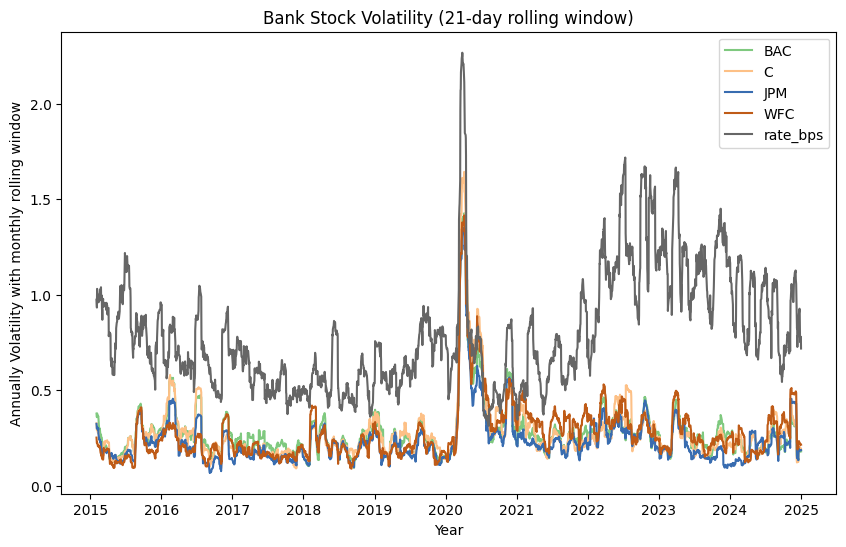

In [10]:
# SMA volatility
window = 21 # 1 month window
print(df_change.columns[0:5])
vol_daily = df_change.rolling(window).std()
vol_annual = vol_daily * np.sqrt(252)
vol_annual.plot(figsize=(10,6),label=df_change.columns[0:5],colormap='Accent')
plt.xlabel('Year')
plt.ylabel('Annually Volatility with monthly rolling window')
plt.title('Bank Stock Volatility (21-day rolling window)')
plt.legend()
plt.show()

                 BAC         C       JPM       WFC  rate_bps
date                                                        
2024-12-24  0.232101  0.254413  0.265593  0.306643  0.862469
2024-12-26  0.225680  0.246993  0.257659  0.297356  0.841949
2024-12-27  0.219438  0.240838  0.252359  0.290869  0.822295
2024-12-30  0.215592  0.236625  0.246751  0.284736  0.862118
2024-12-31  0.209178  0.229436  0.239302  0.276188  0.839173


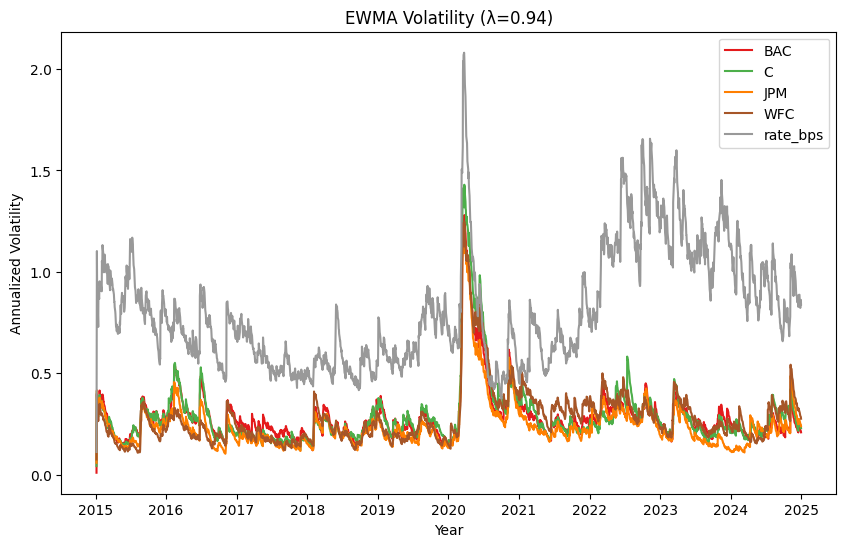

In [11]:
# EWMA volatility
lambda_ = 0.94  
ewma_vol = df_change.ewm(
    span=(2/(1-lambda_)-1),  
    adjust=False
).std() * np.sqrt(252)   # annualized

print(ewma_vol.tail())

ewma_vol.plot(figsize=(10,6),label=log_ret.columns,colormap='Set1')
plt.xlabel('Year')
plt.ylabel('Annualized Volatility')
plt.title('EWMA Volatility (λ=0.94)')
plt.legend()
plt.show()

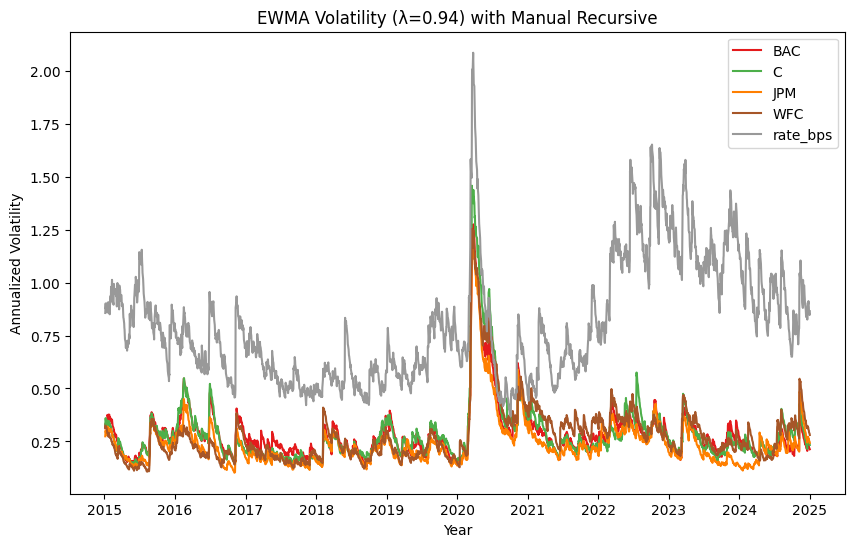

In [12]:
# manual recursive EWMA
tickers = df_change.columns
lambda_ = 0.94
ewma_vol_manual = pd.DataFrame(index=df_change.index,columns=df_change.columns)
for ticker in tickers:
    r = df_change[ticker]
    vol = np.zeros(len(r))
    vol[0] = np.std(r)
    for i in range(1,len(df_change)):
        vol[i] =  np.sqrt(lambda_ * vol[i-1]**2 + (1 - lambda_) * r.iloc[i-1]**2)
        ewma_vol_manual.loc[df_change.index,ticker] = vol
ewma_vol_annual = ewma_vol_manual * np.sqrt(252)

ewma_vol_annual.plot(figsize=(10,6),label=log_ret.columns,colormap='Set1')
plt.xlabel('Year')
plt.ylabel('Annualized Volatility')
plt.title('EWMA Volatility (λ=0.94) with Manual Recursive')
plt.legend()
plt.show()

### Correlation analysis

               BAC         C       JPM       WFC  rate_bps
BAC       1.000000  0.873763  0.892117  0.831937  0.344644
C         0.873763  1.000000  0.862386  0.797335  0.278270
JPM       0.892117  0.862386  1.000000  0.812747  0.329798
WFC       0.831937  0.797335  0.812747  1.000000  0.301539
rate_bps  0.344644  0.278270  0.329798  0.301539  1.000000


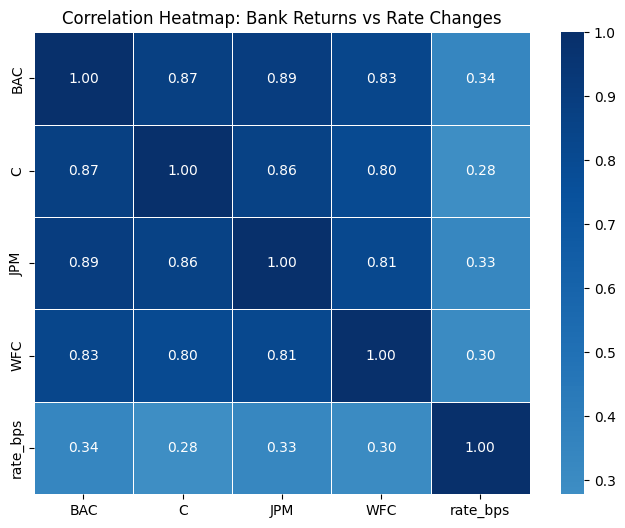

In [13]:
# correlation analysis
import seaborn as sns
corr = df_change.corr()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(
    corr, 
    annot=True,        # show values
    fmt=".2f",         
    cmap="Blues",   
    center=0,          
    linewidths=0.5     
)

plt.title("Correlation Heatmap: Bank Returns vs Rate Changes")
plt.show()

### VaR analysis

             var95     var99
BAC      -0.029137 -0.053712
C        -0.029749 -0.055975
JPM      -0.025803 -0.045499
WFC       -0.02848 -0.057614
rate_bps     -0.08     -0.15


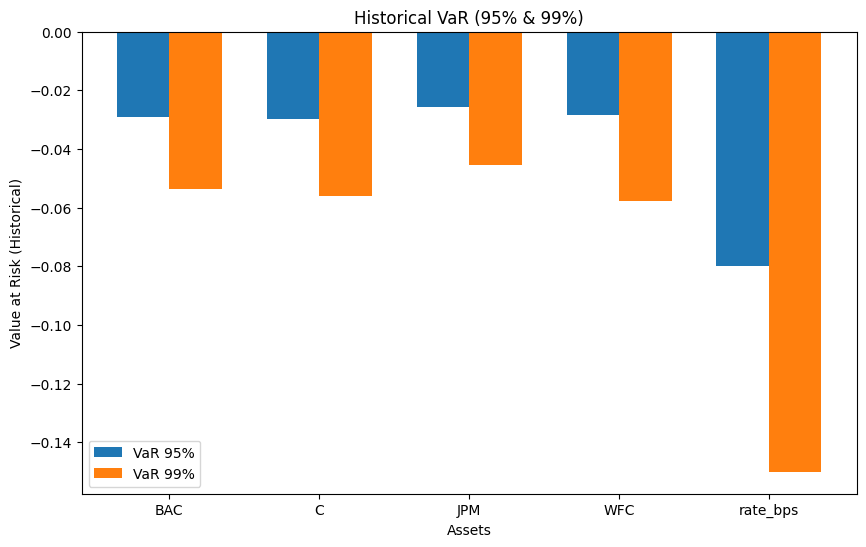

Portfolio Historical VaR 95%:-0.0272
Portfolio Historical VaR 99%:-0.0472


In [14]:
# historical VaR
var_his = pd.DataFrame(index=tickers,columns=['var95','var99'])
for ticker in tickers:
    var_his.loc[ticker,'var95'] = np.percentile(df_change[ticker],5)
    var_his.loc[ticker,'var99']= np.percentile(df_change[ticker],1)
print(var_his)

plt.figure(figsize=(10,6))
x = np.arange(0,5)  # or it can be written as x = np.arange(len(var_his.index))
bar_width = 0.35

plt.bar(x - bar_width/2, var_his['var95'], width=bar_width, label='VaR 95%')
plt.bar(x + bar_width/2, var_his['var99'], width=bar_width, label='VaR 99%')

plt.xticks(x, var_his.index)
plt.xlabel("Assets")
plt.ylabel("Value at Risk (Historical)")
plt.title("Historical VaR (95% & 99%)")
plt.legend()
plt.show()

#portfolio var
weights = np.array([0.25,0.25,0.25,0.25])
port_ret = df_change.iloc[:,0:4].dot(weights)
port_var95 = np.percentile(port_ret, 5)   
port_var99 = np.percentile(port_ret, 1)   

print("Portfolio Historical VaR 95%:{:.4f}".format(port_var95))
print("Portfolio Historical VaR 99%:{:.4f}".format(port_var99))

                mu     sigma
BAC       0.000443  0.019663
C         0.000211  0.020734
JPM       0.000646   0.01728
WFC       0.000215  0.019873
rate_bps  0.000985  0.053956
             var95     var99
BAC        -0.0319   -0.0453
C        -0.033893 -0.048023
JPM      -0.027777 -0.039553
WFC      -0.032473 -0.046017
rate_bps -0.087764 -0.124534


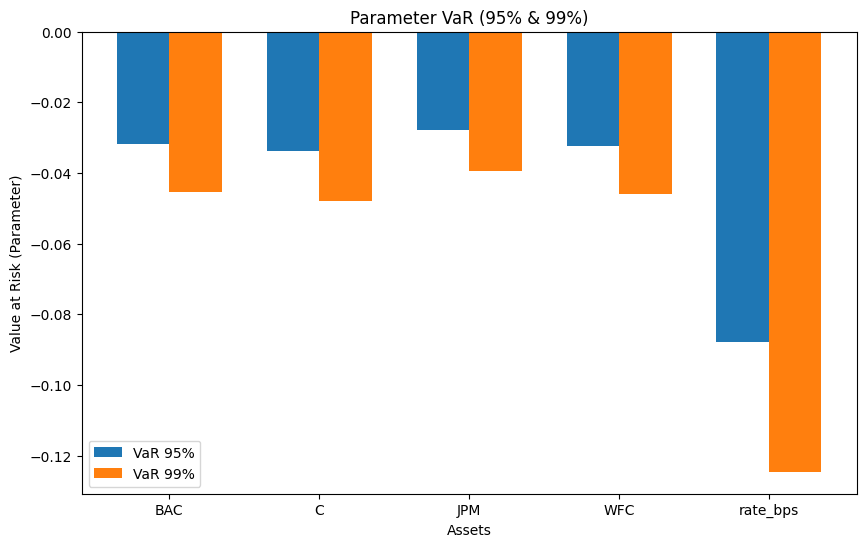

Portfolio Parameter VaR 95%:-0.0296
Portfolio Parameter VaR 99%:-0.0420


In [15]:
# parameter VaR
import scipy.stats as st
para = pd.DataFrame(index=tickers,columns=['mu','sigma'])
var_para = pd.DataFrame(index=tickers,columns=['var95','var99'])
for ticker in tickers:
    para.loc[ticker,'mu'] = df_change[ticker].mean()
    para.loc[ticker,'sigma'] = df_change[ticker].std()
print(para)
for ticker in tickers:
    var_para.loc[ticker,'var95'] = st.norm.ppf(0.05,loc = para.loc[ticker,'mu'], scale = para.loc[ticker,'sigma'])
    var_para.loc[ticker,'var99'] = st.norm.ppf(0.01,loc = para.loc[ticker,'mu'], scale = para.loc[ticker,'sigma'])
print(var_para)

plt.figure(figsize=(10,6))
x = np.arange(0,5)  # or it can be written as x = np.arange(len(var_his.index))
bar_width = 0.35

plt.bar(x - bar_width/2, var_para['var95'], width=bar_width, label='VaR 95%')
plt.bar(x + bar_width/2, var_para['var99'], width=bar_width, label='VaR 99%')

plt.xticks(x, var_his.index)
plt.xlabel("Assets")
plt.ylabel("Value at Risk (Parameter)")
plt.title("Parameter VaR (95% & 99%)")
plt.legend()
plt.show()

#portfolio var
port_mu = port_ret.mean()
port_sigma = port_ret.std()
port_var95_para = st.norm.ppf(0.05,loc = port_mu, scale = port_sigma)  
port_var99_para = st.norm.ppf(0.01,loc = port_mu, scale = port_sigma)    

print("Portfolio Parameter VaR 95%:{:.4f}".format(port_var95_para))
print("Portfolio Parameter VaR 99%:{:.4f}".format(port_var99_para))

# Part 3 Topic Analysis -- Hypothesis 1: Distributional assumption

## Are returns normally distributed?

    Ticker    Mean     Std  Skewness  Excess Kurtosis  JB statistics  \
BAC    BAC  0.0004  0.0197   -0.0175           9.5353      9417.3108   
C        C  0.0002  0.0207   -0.4642          14.0810     20628.7175   
JPM    JPM  0.0006  0.0173   -0.0254          13.3782     18540.2616   
WFC    WFC  0.0002  0.0199   -0.2198           9.1837      8755.4037   

     JB p-value  
BAC         0.0  
C           0.0  
JPM         0.0  
WFC         0.0  


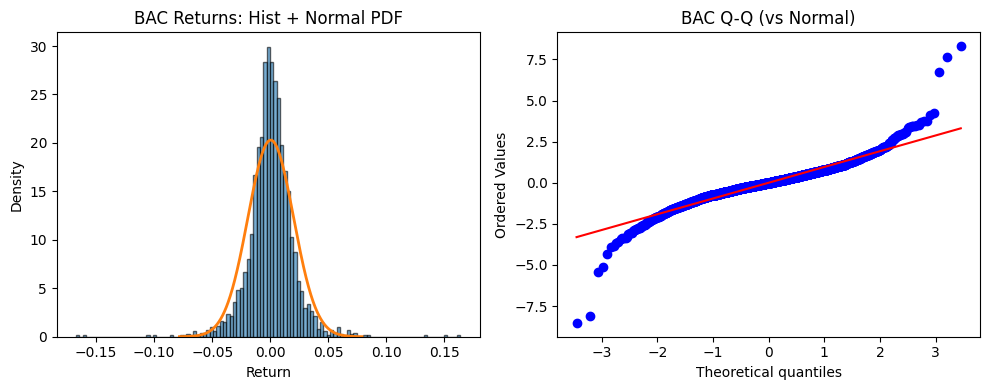

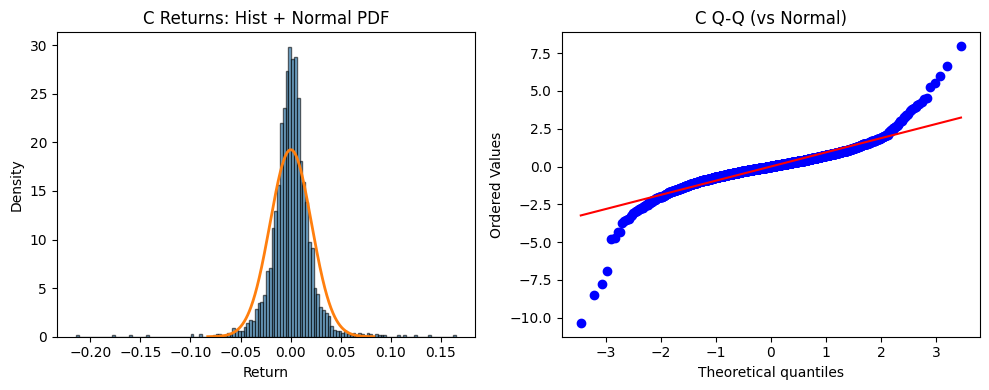

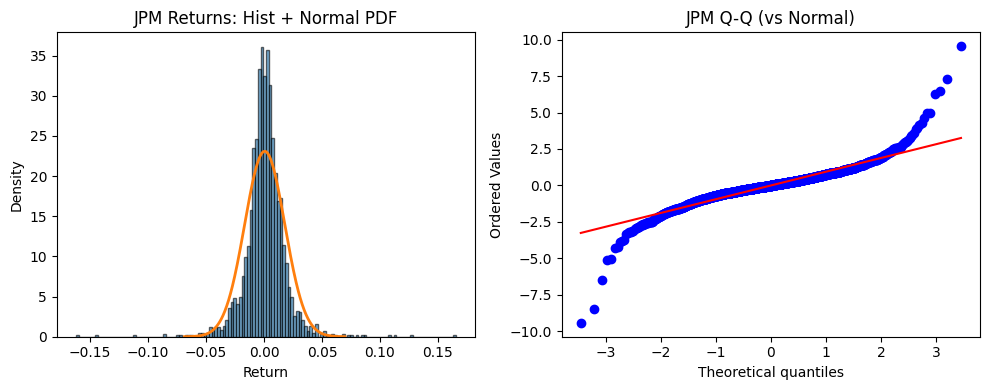

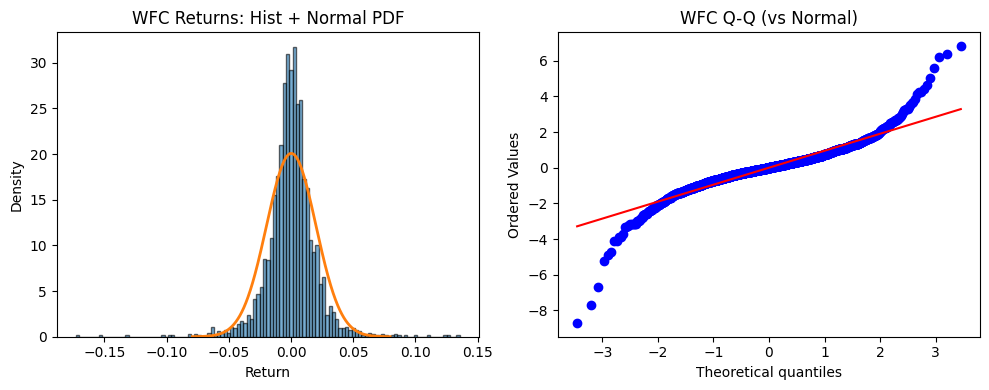

In [16]:
from scipy import stats
stock_tickers = ['BAC','C','JPM','WFC']
results = []
for ticker in stock_tickers:
    mu = np.mean(log_ret[ticker])
    sigma = np.std(log_ret[ticker],ddof=1) #ddof=1, sample unbiased std; ddof=0 population std
    skew = stats.skew(log_ret[ticker],bias = False) #bias=false, unbiased; bias=true, biased
    kurtosis = stats.kurtosis(log_ret[ticker],fisher=True,bias=False) #fisher=True, excess kurtosis; fisher=false, kurtosis
    jb_stat,jb_p = stats.jarque_bera(log_ret[ticker])

    results.append({
        'Ticker':ticker,
        'Mean':mu,
        'Std':sigma,
        'Skewness':skew,
        'Excess Kurtosis':kurtosis,
        'JB statistics': jb_stat,
        'JB p-value': jb_p
    })
summary = pd.DataFrame(results).set_index(log_ret.columns)
print(summary.round(4))

def plot_ret(series,title=None):
    x = series.dropna().values
    mu = np.mean(x)
    sigma = np.std(x,ddof=1)
    fig,axes = plt.subplots(1,2,figsize=(10,4))
    ax = axes[0]
    ax.hist(x,bins='auto',density=True,alpha=0.6,edgecolor='black')
    grid = np.linspace(mu - 4*sigma,mu + 4*sigma,500)
    ax.plot(grid,stats.norm.pdf(grid,loc=mu,scale=sigma),linewidth=2)
    ax.set_title(f'{title} Returns: Hist + Normal PDF')
    ax.set_xlabel('Return')
    ax.set_ylabel('Density')

    z = (x-mu)/sigma
    ax = axes[1]
    stats.probplot(z,dist='norm',plot=ax)
    ax.set_title(f'{title} Q-Q (vs Normal)')

    plt.tight_layout()
    plt.show()

for ticker in stock_tickers:
    plot_ret(log_ret[ticker],title=ticker)

# Part 4 Topic Analysis -- Hypothesis 2: Volatility clustering

## Do returns exhibit autocorrelation in volatility?

In [17]:
from scipy.optimize import minimize

# ACF ACF(k) = Σ(xₜxₜ₋ₖ) / Σ(xₜ²) for t = k+1 to n
def acf(x, nlags=20):  #nlags=20: number of lags to compute (defaults to 20)
    x = np.asarray(x)   # converts the input x to a NumPy array 
    x = x[~np.isnan(x)] # removes any nan
    n = x.size 
    x = x - x.mean()  # mean-centers the data, crucial for autocorrelation calculation, removes any constant bias
    denom = np.dot(x, x) # dot product of x with itself, = sum of squares
    ac = [1.0]  # autocorrelation at lag 0 is always 1.0 (perfect correlation with itself)
    for k in range(1, nlags+1):  # loops through each lag from 1 to n 
        num = np.dot(x[:-k], x[k:]) 
        # numerator for lag k
        # x[:-k] selects all elements except the last k elements
        # x[k:] selects all elements starting from position k
        # computes the covariance between the time series and its lagged version
        ac.append(num / denom)
    return np.array(ac)

# Ljung-Box Q test 
def ljung_box_q(x, lags=20):
    x = np.asarray(x)
    x = x[~np.isnan(x)]
    n = x.size
    rho = acf(x, nlags=lags)[1:]  
    # use acf function to compute autocorrelations
    # slices the array to exclude lag 0
    # rho contains autocorrelations for lags 1 through lags
    k = np.arange(1, lags+1)
    Q = n * (n + 2) * np.sum((rho**2) / (n - k))
    # Ljung-Box Q statistic: Q = n(n + 2) × Σ(ρₖ² / (n - k)) for k = 1 to m
    pval = 1 - stats.chi2.cdf(Q, df=lags)  #p-value for the test
    return Q, pval


def arch_lm_test(eps, lags=10):
    """
    arch_lm_test that takes two parameters:
    eps: the residual series from a model
    lags=10: number of lags to include in the test (defaults 10)
    Interpretation of the ARCH-LM test:
    Null hypothesis: No ARCH effects (no conditional heteroscedasticity)
    Alternative hypothesis: ARCH effects exist (volatility clustering)
    If p-value < significance level (e.g., 0.05): Reject null - ARCH effects detected
    If p-value ≥ significance level: Fail to reject null - no significant ARCH effects
    """
    y = eps**2  # residual squre
    y = y[~np.isnan(y)]  
    T = y.size
    X = np.ones((T - lags, 1))  # T - lags: lose lags when creating lagged variables
    for j in range(1, lags+1):
        X = np.column_stack([X, y[lags-j:T-j]])
        # y[lags-j:T-j] creates the j-th lag of the squared residuals
        # np.column_stack adds each lag as a new column to the design matrix
        # after this loop, X contains: [constant, lag1, lag2, ..., lag_lags]
        """
        Time:   0  1  2  3  4  5  6  7  8  9  (indices)
        y:      1  2  3  4  5  6  7  8  9  10
        y_dep:  4  5  6  7  8  9  10   (starts at index 3)
        Lag 1:  3  4  5  6  7  8  9    (y[t-1]) y_dep
        Lag 2:  2  3  4  5  6  7  8    (y[t-2]) y_dep
        Lag 3:  1  2  3  4  5  6  7    (y[t-3]) y_dep
        y_dep[0] = 4 (y₃²)
        Lag 1[0] = 3 (y₂²) ← yₜ₋₁² ✓
        Lag 2[0] = 2 (y₁²) ← yₜ₋₂² ✓  
        Lag 3[0] = 1 (y₀²) ← yₜ₋₃² ✓
        yₜ² = β₀ + β₁·yₜ₋₁² + β₂·yₜ₋₂² + β₃·yₜ₋₃² + εₜ
        """
    y_dep = y[lags:] # squared residuals starting from position lags
    beta = np.linalg.lstsq(X, y_dep, rcond=None)[0]  #linear algebra; rcond=None uses the default threshold for determining the matrix rank
    y_hat = X @ beta  # predicted values
    ssr = np.sum((y_dep - y_hat)**2)  # Sum of Squared Residuals (SSR) 
    sst = np.sum((y_dep - y_dep.mean())**2)  # Total Sum of Squares (SST)
    R2 = 1 - ssr/sst 
    LM = (T - lags) * R2  # LM test statistic: LM = n × R²
    pval = 1 - stats.chi2.cdf(LM, df=lags)
    return LM, pval


def garch11_fit(r):
    """
    return series r
    GARCH(1,1) volatility: σₜ² = ω + α·εₜ₋₁² + β·σₜ₋₁²
    """
    r = np.asarray(r)
    r = r[~np.isnan(r)]
    n = r.size
    def negloglike(params):  # negative log-likelihood function needed minimized (no minimize, only maximize)
        mu, omega, alpha, beta = params
        if omega <= 1e-12 or alpha < 0 or beta < 0 or (alpha + beta) >= 0.9999:
            return 1e12  # penalize invalid region
        # returns a large penalty value if constraints are violated
        eps = r - mu  #residual
        var = np.empty(n)
        # initialize variance with sample variance
        var0 = np.var(eps, ddof=1)
        var[0] = max(omega + alpha * eps[0]**2 + beta * var0, 1e-12)
        # max ensures variance > = 0 
        for t in range(1, n):
            var[t] = omega + alpha * eps[t-1]**2 + beta * var[t-1]
            # σₜ² = ω + α·εₜ₋₁² + β·σₜ₋₁²
            if var[t] <= 0:
                return 1e12
        # Gaussian log-likelihood
        ll = -0.5 * (np.log(2*np.pi) + np.log(var) + (eps**2)/var)
        # logL = -½[log(2π) + log(σₜ²) + εₜ²/σₜ²] 
        return -np.sum(ll)
    # initial guesses
    mu0 = np.mean(r)
    var0 = np.var(r, ddof=1)
    x0 = np.array([mu0, 0.1*var0, 0.05, 0.9])
    """
    0.1*var0: ω is typically much smaller than the unconditional variance
    0.05: Common initial value for ARCH coefficient (α)
    0.9: Common initial value for GARCH coefficient (β) - volatility is persistent
    """
    # bounds and constraint (alpha+beta < 1)
    bnds = [(-1, 1), (1e-12, None), (0, 1), (0, 1)]
    """
    mu: between -1 and 1 (reasonable for daily returns)
    omega: positive (≥ 1e-12 for numerical stability)
    alpha: between 0 and 1 (non-negative, typically < 0.3)
    beta: between 0 and 1 (non-negative, typically 0.7-0.95)
    """
    cons = ({'type': 'ineq', 'fun': lambda p: 0.9999 - (p[2] + p[3])})
    # ineq : the function should return ≥ 0 

    res = minimize(negloglike, x0, method='SLSQP', bounds=bnds, constraints=cons, options={'maxiter': 2000})
    # SLSQP: Sequential Least Squares Programming - good for constrained optimization
    # maxiter=2000: up to 2000 iterations for convergence
    mu, omega, alpha, beta = res.x
    # rebuild conditional variance with fitted params
    eps = r - mu
    var = np.empty(n)
    var_init = np.var(eps, ddof=1)
    var[0] = max(omega + alpha * eps[0]**2 + beta * var_init, 1e-12)
    for t in range(1, n):
        var[t] = omega + alpha * eps[t-1]**2 + beta * var[t-1]

    out = {
        'mu': mu, 'omega': omega, 'alpha': alpha, 'beta': beta,
        'alpha+beta': alpha + beta,
        'sigma': np.sqrt(var),
        'success': res.success, 'message': res.message
    }
    return out

def ewma_sigma(eps, lam=0.94):
    eps = np.asarray(eps)
    n = eps.size
    var = np.empty(n)
    var[0] = np.var(eps, ddof=1)
    for t in range(1, n):
        var[t] = lam * var[t-1] + (1 - lam) * eps[t-1]**2
    return np.sqrt(var)

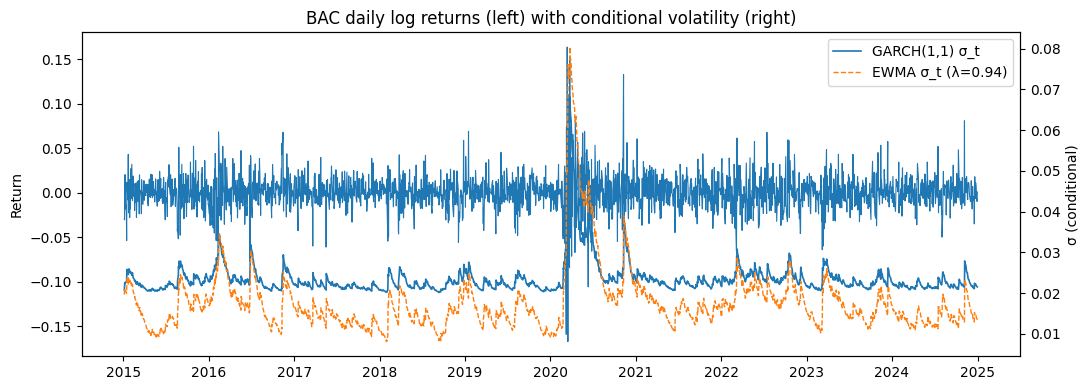

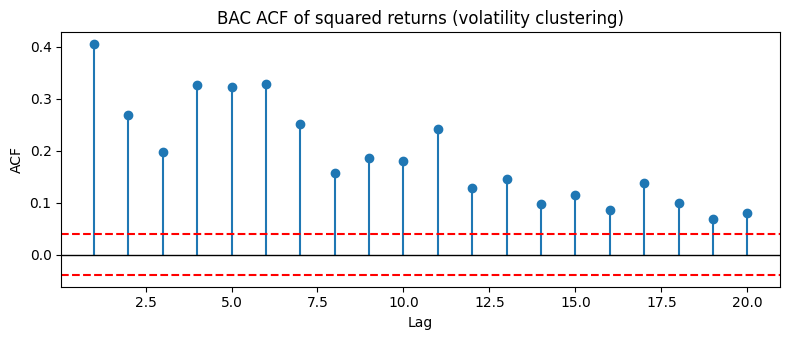

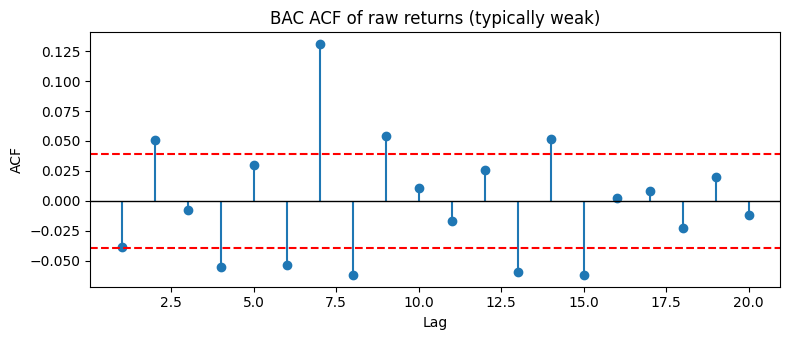

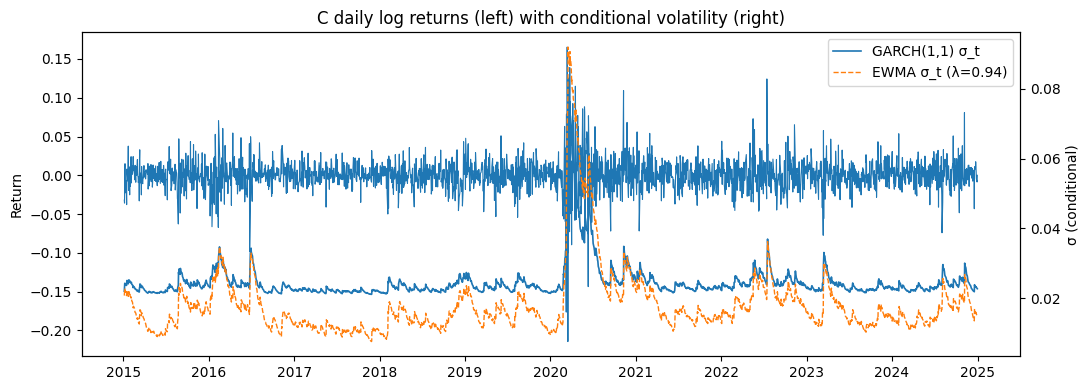

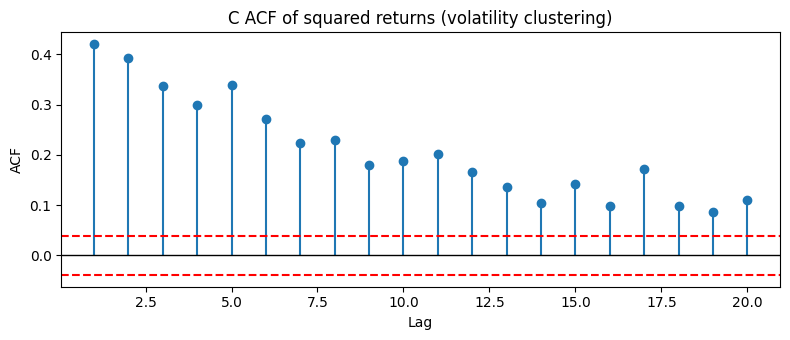

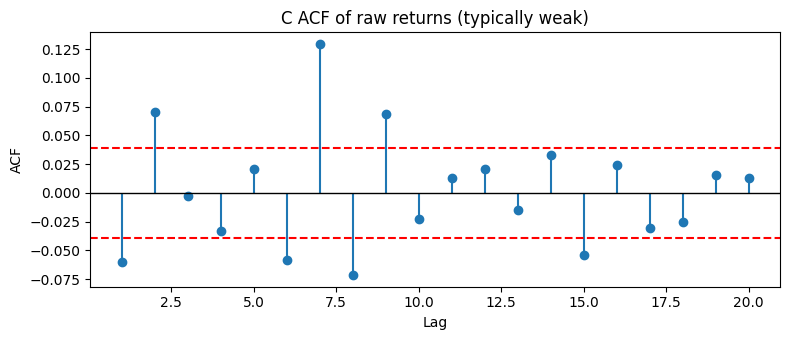

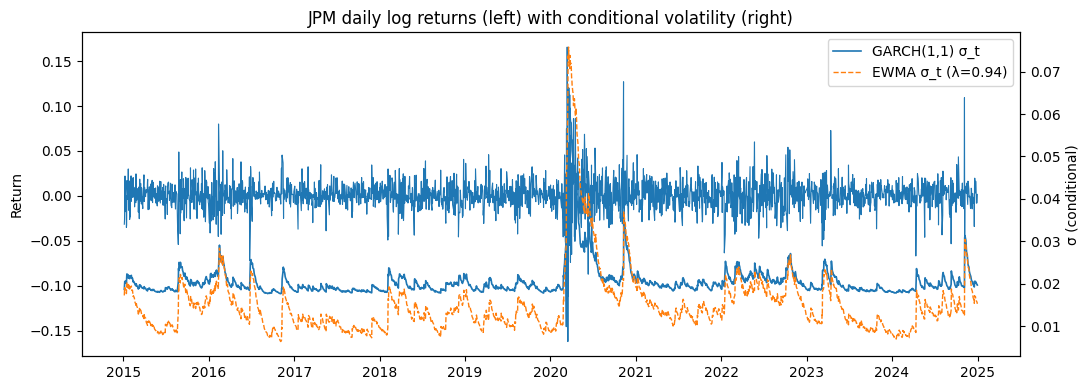

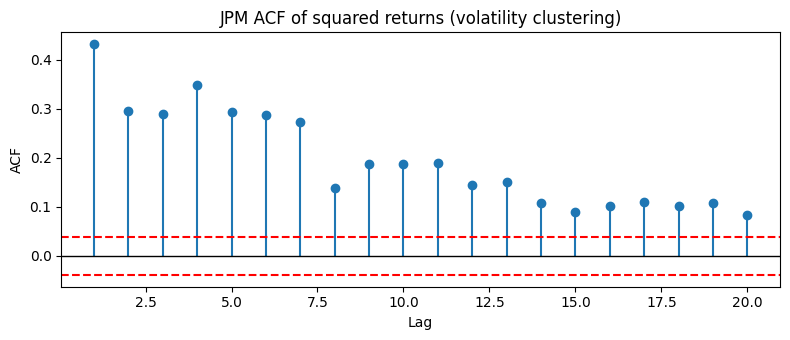

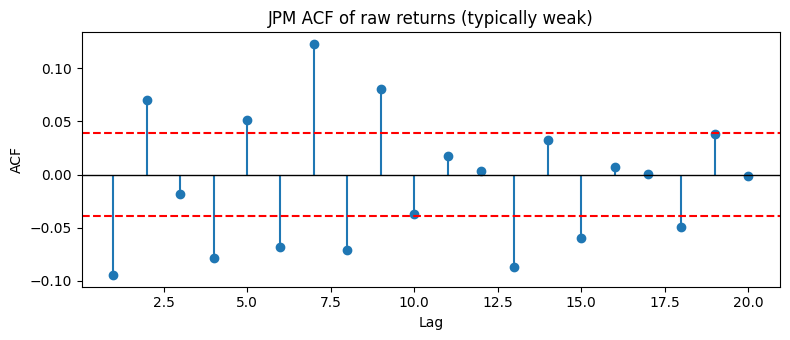

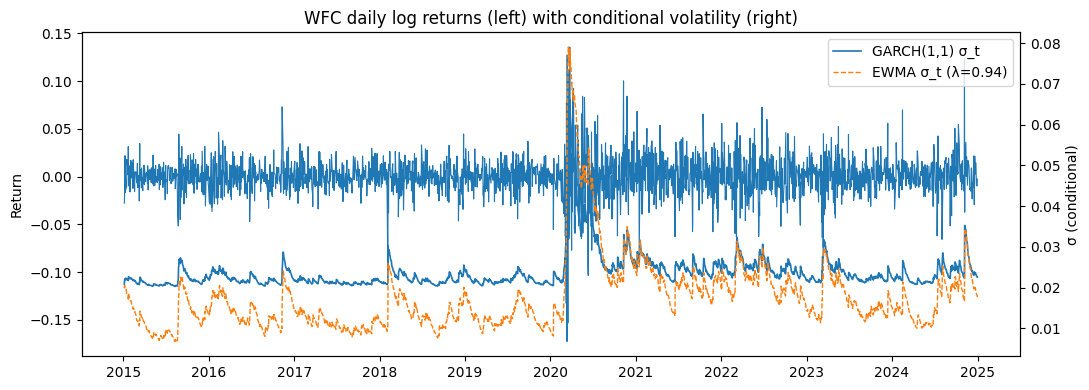

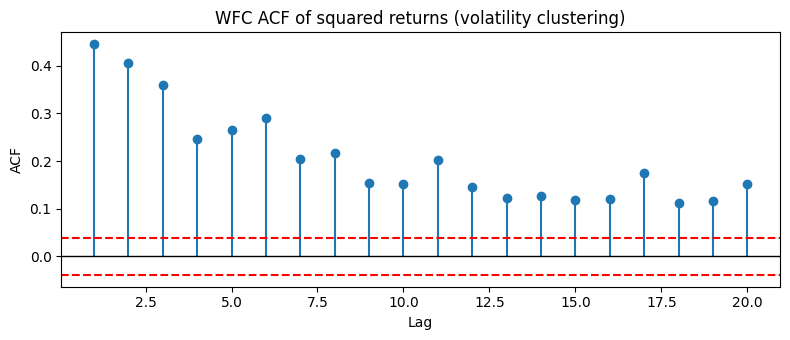

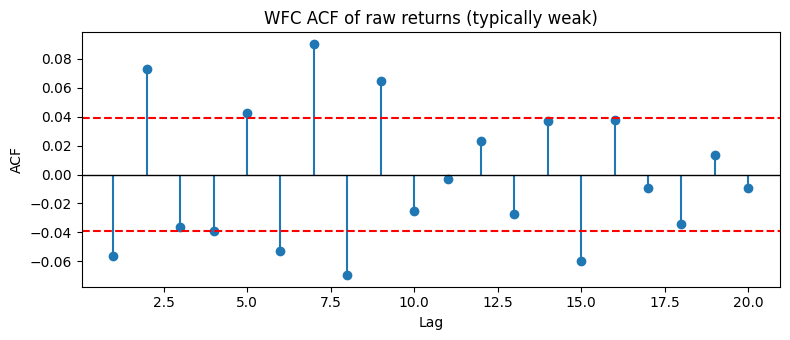

,mu,omega,alpha,beta,alpha+beta,JB_stat(z),JB_p(z),LjungBox_Q(20) on r^2,LB_p,ARCH_LM(10),ARCH_p,SLSQP_success
Ticker,,,,,,,,,,,,
BAC,0.000443,0.000039,0.050000,0.900000,0.950000,1022.741103,0.0,2294.990761,0.0,667.479912,0.0,True
C,0.000595,0.000043,0.050881,0.898854,0.949735,1756.672208,0.0,2709.365315,0.0,679.882467,0.0,True
JPM,0.000646,0.000030,0.050000,0.900000,0.950000,2494.352309,0.0,2403.990315,0.0,698.392796,0.0,True
WFC,0.000215,0.000039,0.050000,0.900000,0.950000,1642.096437,0.0,2621.029206,0.0,717.698538,0.0,True


In [38]:
nlags_show = 20
arch_lags = 10
ewma_lambda = 0.94


garch_table = []
for ticker in stock_tickers:
    r = log_ret[ticker].dropna()
    t_idx = r.index

    # 1) ACFs (returns vs squared/absolute returns) 
    rho_r = acf(r.values, nlags=nlags_show)
    rho_sq = acf((r.values**2), nlags=nlags_show)
    rho_abs = acf(np.abs(r.values), nlags=nlags_show)
    
    lags_plot_r   = np.arange(1, nlags_show+1)
    rho_r_plot    = rho_r[1:]
    lags_plot_sq  = np.arange(1, nlags_show+1)
    rho_sq_plot   = rho_sq[1:]
    
    conf = 1.96 / np.sqrt(len(r.values))

    # 2) Tests on squared returns (vol clustering)
    Q, Qp = ljung_box_q(r.values**2, lags=nlags_show)
    LM, LMp = arch_lm_test(r.values - r.mean(), lags=arch_lags)

    # 3) GARCH(1,1) fit 
    fit = garch11_fit(r.values)
    mu, omega, alpha, beta, aplusb = fit['mu'], fit['omega'], fit['alpha'], fit['beta'], fit['alpha+beta']
    sigma_garch = pd.Series(fit['sigma'], index=t_idx)
    eps = r.values - mu
    # JB on standardized residuals (innovations)
    z = eps / sigma_garch.values
    jb_stat, jb_p = stats.jarque_bera(z)
    sigma_ewma = pd.Series(ewma_sigma(eps, lam=ewma_lambda), index=t_idx)
    
    garch_table.append({
        'Ticker': ticker, 'mu': mu, 'omega': omega, 'alpha': alpha, 'beta': beta,
        'alpha+beta': aplusb,'JB_stat(z)': jb_stat,'JB_p(z)': jb_p,
        f'LjungBox_Q({nlags_show}) on r^2': Q, 'LB_p': Qp,
        f'ARCH_LM({arch_lags})': LM, 'ARCH_p': LMp,
        'SLSQP_success': fit['success']
    })

    # 4) Plots 
    # (a) Returns with fitted conditional vol (GARCH & EWMA)
    fig, ax1 = plt.subplots(figsize=(11, 4))
    ax1.plot(t_idx, r.values, lw=0.8)
    ax1.set_title(f"{ticker} daily log returns (left) with conditional volatility (right)")
    ax1.set_ylabel("Return")

    ax2 = ax1.twinx()
    ax2.plot(t_idx, sigma_garch.values, lw=1.2, label='GARCH(1,1) σ_t')
    ax2.plot(t_idx, sigma_ewma.values, lw=1.0, linestyle='--', label=f"EWMA σ_t (λ={ewma_lambda})")
    ax2.set_ylabel("σ (conditional)")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

    
    # (b) ACF of squared returns (no lag 0), with bands + y=0
    plt.figure(figsize=(8, 3.5))
    plt.stem(lags_plot_sq, rho_sq_plot, basefmt=" ")
    plt.axhline(conf,  linestyle='--', color='red')
    plt.axhline(-conf, linestyle='--', color='red')
    plt.axhline(0,     color="black", linewidth=1)
    plt.title(f"{ticker} ACF of squared returns (volatility clustering)")
    plt.xlabel("Lag"); plt.ylabel("ACF")
    plt.tight_layout(); plt.show()
    
    # (c) ACF of raw returns (no lag 0), with bands + y=0
    plt.figure(figsize=(8, 3.5))
    plt.stem(lags_plot_r, rho_r_plot, basefmt=" ")
    plt.axhline(conf,  linestyle='--', color='red')
    plt.axhline(-conf, linestyle='--', color='red')
    plt.axhline(0,     color="black", linewidth=1)
    plt.title(f"{ticker} ACF of raw returns (typically weak)")
    plt.xlabel("Lag"); plt.ylabel("ACF")
    plt.tight_layout(); plt.show()


# 5) Parameter table
garch_df = pd.DataFrame(garch_table).set_index('Ticker')
display(garch_df.round(6))

# Part 5 Topic Analysis -- Hypothesis 3: Asymmetric volatility

## Do negative returns increase volatility more than positive returns of the same magnitude?

In [40]:
def _aic_bic(ll, k, n):  # ll: log-likelihood value; k: number of parameters in the model; n: number of observations
    aic = 2*k - 2*ll  # AIC = 2k - 2log(L)
    bic = k*np.log(n) - 2*ll  # BIC = k·log(n) - 2log(L)
    return aic, bic

def _num_hessian(f, x0, eps=1e-6):
    # simple central-difference Hessian (symmetric)
    x0 = np.asarray(x0, dtype=float)
    k = x0.size
    H = np.zeros((k, k), dtype=float)
    f0 = f(x0)
    for i in range(k):
        xi_p = x0.copy(); xi_m = x0.copy()
        xi_p[i] += eps; xi_m[i] -= eps
        f_ip = f(xi_p); f_im = f(xi_m) 
        H[i, i] = (f_ip - 2*f0 + f_im) / (eps**2) 
        # Diagonal elements: Second derivative approximation using central difference: ∂²f/∂xᵢ² ≈ [f(x+εeᵢ) - 2f(x) + f(x-εeᵢ)] / ε²
        for j in range(i+1, k):
            xpp = x0.copy(); xpm = x0.copy()
            xmp = x0.copy(); xmm = x0.copy()
            xpp[i]+=eps; xpp[j]+=eps
            xpm[i]+=eps; xpm[j]-=eps
            xmp[i]-=eps; xmp[j]+=eps
            xmm[i]-=eps; xmm[j]-=eps
            H_ij = (f(xpp) - f(xpm) - f(xmp) + f(xmm)) / (4*eps**2)
            # Off-diagonal elements: Mixed partial derivative approximation: ∂²f/∂xᵢ∂xⱼ ≈ [f(x+εeᵢ+εeⱼ) - f(x+εeᵢ-εeⱼ) - f(x-εeᵢ+εeⱼ) + f(x-εeᵢ-εeⱼ)] / (4ε²)
            H[i, j] = H[j, i] = H_ij
    return H

def _stderr_from_hessian(negloglike, params_hat):  
    """
    compute parameter standard errors from Hessian
    negloglike: negative log-likelihood function
    params_hat: estimated parameter values
    """
    # Var(theta) ≈ [H(negloglike)]^{-1}; H is evaluated at the optimum
    # Variance-covariance matrix is approximately the inverse of the Hessian
    H = _num_hessian(negloglike, np.array(params_hat))
    try:
        cov = np.linalg.inv(H)   # invert the Hessian to get variance-covariance matrix
        se = np.sqrt(np.diag(cov))  # extracts standard errors as square roots of diagonal elements
    except np.linalg.LinAlgError:
        se = np.full(len(params_hat), np.nan)  # if Hessian inversion fails, returns nan
    return se

def garch_llf_from_sigma(r, mu, sigma, var_floor=1e-10):
    eps = r - mu
    var = np.maximum(sigma**2, var_floor)
    ll  = -0.5*(np.log(2*np.pi) + np.log(var) + (eps**2)/var)
    return np.sum(ll)      


In [41]:
# ---------- Robust SE helpers (drop-in) ----------
import numpy as np

def _is_pos_def(M):
    try:
        # Cholesky is a good PD check
        np.linalg.cholesky(M)
        return True
    except np.linalg.LinAlgError:
        return False

def _robust_inverse(H, ridge0=1e-8, max_tries=8):
    """
    Try to invert Hessian H. If not PD, add ridge*I, growing ridge geometrically.
    Fall back to pseudo-inverse if needed. Returns (cov, used_pinv, ridge_used).
    """
    I = np.eye(H.shape[0])
    ridge = ridge0
    for _ in range(max_tries):
        H_r = H + ridge * I
        if _is_pos_def(H_r):
            try:
                cov = np.linalg.inv(H_r)
                return cov, False, ridge
            except np.linalg.LinAlgError:
                pass
        ridge *= 10.0  # increase regularization
    # fallback
    cov = np.linalg.pinv(H)
    return cov, True, 0.0

def _stderr_from_hessian_robust(negloglike, params_hat, hess_eps=1e-5, ridge0=1e-8):
    """
    Safer SEs from numerical Hessian of NEGATIVE log-likelihood.
    Returns SE array and a small diagnostics dict.
    """
    H = _num_hessian(negloglike, np.array(params_hat, dtype=float), eps=hess_eps)
    cov, used_pinv, ridge_used = _robust_inverse(H, ridge0=ridge0)

    # Diagonal can still be slightly negative due to numerical noise: clip to nan
    diag = np.diag(cov)
    se = np.empty_like(diag)
    se[:] = np.nan
    pos = diag > 0
    se[pos] = np.sqrt(diag[pos])

    info = {
        "hess_eps": hess_eps,
        "ridge_used": ridge_used,
        "used_pinv": bool(used_pinv),
        "min_diag_cov": float(np.nanmin(diag)),
        "max_diag_cov": float(np.nanmax(diag))
    }
    return se, info

In [42]:

# sigma_t^2 = ω + α ε_{t-1}^2 + γ I(ε_{t-1}<0) ε_{t-1}^2 + β σ_{t-1}^2
"""
GJR-GARCH(1,1) model: Allows asymmetric volatility response
γ I(εₜ₋₁<0) εₜ₋₁²: Extra volatility effect for negative shocks (leverage effect)
I(εₜ₋₁<0) is an indicator function (1 if negative, 0 otherwise)
"""
def fit_gjr_garch(r):
    r = np.asarray(r, float)
    r = r[~np.isnan(r)]
    n = len(r)
    var_floor = 1e-10   
    def nll(theta):  # Negative Log-Likelihood Function
        mu, omega, alpha, gamma, beta = theta
        # basic constraints
        if omega <= 1e-12 or alpha < 0 or gamma < 0 or beta < 0:
            return 1e12
        if (alpha + 0.5*gamma + beta) >= 0.999:   #tighter bound
            return 1e12
        eps = r - mu
        var = np.empty(n)
        v0 = np.var(eps, ddof=1)
        var[0] = max(omega + (alpha + 0.5*gamma + beta)*v0, var_floor)   # variance >= 0
        for t in range(1, n):
            Ineg = 1.0 if eps[t-1] < 0 else 0.0
            v = omega + (alpha + gamma*Ineg)*eps[t-1]**2 + beta*var[t-1]
            if not np.isfinite(v):           # CHANGE: keep the finiteness check on v
                return 1e12
            var[t] = max(v, var_floor)       # CHANGE: floor and then assign
        ll = -0.5*(np.log(2*np.pi) + np.log(var) + (eps**2)/var)  #log likelihood
        S = np.sum(ll)
        if not np.isfinite(S):                                         
            return 1e12
        return -S  

    mu0 = np.mean(r); v0 = np.var(r, ddof=1)
    x0  = np.array([mu0, 0.05*v0, 0.05, 0.05, 0.90])
    bnds = [(-1,1), (1e-12,None), (0,1), (0,1), (0,0.999)]
    cons = ({'type':'ineq','fun': lambda th: 0.999 - (th[2] + 0.5*th[3] + th[4])})

    res = minimize(nll, x0, method='SLSQP', bounds=bnds, constraints=cons, options={'maxiter':2000})
    mu, omega, alpha, gamma, beta = res.x
    """
    μ: sample mean
    ω: 5% of sample variance
    α: 0.05 (typical ARCH effect)
    γ: 0.05 (typical leverage effect)
    β: 0.9 (typical persistence)
    res.x is the optimized parameter vector that minimizes the negative log-likelihood function
    """
    # optimizes using SLSQP with constraints

    # reconstructs conditional variance series with fitted parameters
    eps = r - mu
    var = np.empty(n); v_init = np.var(eps, ddof=1)
    var[0] = max(omega + (alpha + 0.5*gamma + beta)*v_init, var_floor)  
    for t in range(1, n):
        Ineg = 1.0 if eps[t-1] < 0 else 0.0
        var[t] = max(omega + (alpha + gamma*Ineg)*eps[t-1]**2 + beta*var[t-1], var_floor) 
    sigma = np.sqrt(var)

    # computes standard errors(using hessian) and t-statistics for hypothesis testing
    # computes standard errors(using robust Hessian) and t-statistics
    se, se_info = _stderr_from_hessian_robust(nll, res.x, hess_eps=1e-5, ridge0=1e-8)
    tstats = res.x / se if np.all(np.isfinite(se)) else np.full_like(res.x, np.nan)
    # print("GJR-GARCH SE diagnostics:", se_info)
    # calculates log-likelihood, AIC, and BIC for model comparison
    llf = -nll(res.x); k = len(res.x)
    aic, bic = _aic_bic(llf, k, n)
    out = {'params': {'mu':mu,'omega':omega,'alpha':alpha,'gamma':gamma,'beta':beta},
           'se': {'mu':se[0],'omega':se[1],'alpha':se[2],'gamma':se[3],'beta':se[4]},
           't':  {'mu':tstats[0],'omega':tstats[1],'alpha':tstats[2],'gamma':tstats[3],'beta':tstats[4]},
           'sigma': sigma, 'eps': eps, 'llf': llf, 'aic': aic, 'bic': bic, 'success': res.success, 'message': res.message}
    return out


In [43]:
# log(σ_t^2) = ω + β log(σ_{t-1}^2) + α (|z_{t-1}| - E|Z|) + γ z_{t-1}, z ~ N(0,1)
"""
EGARCH(1,1) model: Exponential GARCH model for asymmetric volatility
Models the log of variance (always positive, no constraints needed)
α(|zₜ₋₁| - E|Z|): Magnitude effect (volatility clustering)
γ zₜ₋₁: Sign effect (leverage/asymmetry)
E|Z| = √(2/π) for standard normal
"""
def fit_egarch(r):
    r = np.asarray(r, float)
    r = r[~np.isnan(r)]
    n = len(r)
    EabsZ = np.sqrt(2/np.pi)  # calculates E|Z| for standard normal
    var_floor = 1e-10           
    sig_floor = 1e-5            
    clip_lo, clip_hi = -25.0, 25.0   
    
    def nll(theta):
        mu, omega, alpha, gamma, beta = theta
        if not (-0.999 < beta < 0.999):     # CHANGE: tighter beta
            return 1e12
        if not np.all(np.isfinite(theta)):  # CHANGE
            return 1e12
        eps = r - mu
        logv = np.empty(n)
        logv[0] = np.log(np.var(eps, ddof=1) + var_floor)   # initialize log-variance = log of sample variance
        for t in range(1, n):
            sig_prev = np.exp(0.5*logv[t-1])
            sig_prev = max(sig_prev, sig_floor)   
            z_prev = eps[t-1] / sig_prev   # standardized residuals: zₜ₋₁ = εₜ₋₁/σₜ₋₁ ~ N(0,1)
            lv = omega + beta*logv[t-1] + alpha*(np.abs(z_prev) - EabsZ) + gamma*z_prev
            if not np.isfinite(lv): return 1e12             
            logv[t] = np.clip(lv, clip_lo, clip_hi)         

        var = np.maximum(np.exp(logv), var_floor)           
        ll  = -0.5*(np.log(2*np.pi) + np.log(var) + (eps**2)/var)
        S   = np.sum(ll)
        if not np.isfinite(S): return 1e12                 
        return -S

    mu0 = np.mean(r)
    x0  = np.array([mu0, -0.1, 0.1, -0.05, 0.9])  # reasonable starts
    """
    ω: -0.1 (typical for log-variance intercept)
    α: 0.1 (volatility clustering effect)
    γ: -0.05 (leverage effect, typically negative)
    β: 0.9 (high persistence in log-volatility)
    """
    bnds = [(-1,1), (None,None), (None,None), (None,None), (-0.9999,0.9999)]
    res = minimize(nll, x0, method='SLSQP', bounds=bnds, options={'maxiter':2000})
    mu, omega, alpha, gamma, beta = res.x

    # reconstructs the volatility series with fitted parameters
    eps = r - mu
    logv = np.empty(n); logv[0] = np.log(np.var(eps, ddof=1) + var_floor)  
    for t in range(1, n):
        sig_prev = np.exp(0.5*logv[t-1]); sig_prev = max(sig_prev, sig_floor)  
        z_prev   = eps[t-1] / sig_prev
        lv = omega + beta*logv[t-1] + alpha*(np.abs(z_prev) - EabsZ) + gamma*z_prev
        logv[t] = np.clip(lv, clip_lo, clip_hi)                              
    var   = np.maximum(np.exp(logv), var_floor)                                
    sigma = np.sqrt(var)
    # computes standard errors, t-stats, and information criteria
    se, se_info = _stderr_from_hessian_robust(nll, res.x, hess_eps=1e-5, ridge0=1e-8)
    tstats = res.x / se if np.all(np.isfinite(se)) else np.full_like(res.x, np.nan)
    # print("EGARCH SE diagnostics:", se_info)

    llf = -nll(res.x); k = len(res.x)
    aic, bic = _aic_bic(llf, k, n)
    
    out = {'params': {'mu':mu,'omega':omega,'alpha':alpha,'gamma':gamma,'beta':beta},
           'se': {'mu':se[0],'omega':se[1],'alpha':se[2],'gamma':se[3],'beta':se[4]},
           't':  {'mu':tstats[0],'omega':tstats[1],'alpha':tstats[2],'gamma':tstats[3],'beta':tstats[4]},
           'sigma': sigma, 'eps': eps, 'llf': llf, 'aic': aic, 'bic': bic, 'success': res.success, 'message': res.message}
    return out

C:\Users\amusi\AppData\Local\Temp\ipykernel_14248\2288054900.py:33: RuntimeWarning: divide by zero encountered in log
  (lambda eps,var: np.sum(-0.5*(np.log(2*np.pi)+np.log(var)+(eps**2)/var)))(
C:\Users\amusi\AppData\Local\Temp\ipykernel_14248\2288054900.py:33: RuntimeWarning: divide by zero encountered in divide
  (lambda eps,var: np.sum(-0.5*(np.log(2*np.pi)+np.log(var)+(eps**2)/var)))(
C:\Users\amusi\AppData\Local\Temp\ipykernel_14248\2288054900.py:33: RuntimeWarning: invalid value encountered in add
  (lambda eps,var: np.sum(-0.5*(np.log(2*np.pi)+np.log(var)+(eps**2)/var)))(


                mu   omega   alpha   gamma  beta  t(gamma)        LLF  \
Model                                                                   
GARCH(1,1)  0.0004  0.0000  0.0500     NaN  0.90       NaN  6370.3824   
GJR-GARCH   0.0004  0.0000  0.0500  0.0500  0.90       NaN  6538.6351   
EGARCH      0.0006 -0.3993  0.1694 -0.1094  0.95   -8.1538  6620.4016   

                   AIC         BIC  
Model                               
GARCH(1,1) -12732.7649 -12709.4735  
GJR-GARCH  -13067.2701 -13038.1559  
EGARCH     -13230.8032 -13201.6890  

Interpretation tip: Significant γ (>~1.96 in |t|) supports asymmetry (leverage).


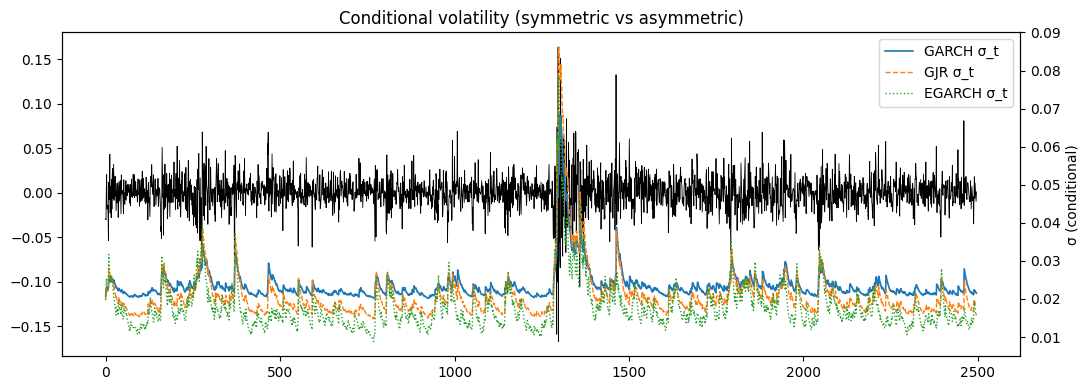

In [29]:
r = log_ret['BAC'].dropna().values  

gjr = fit_gjr_garch(r)
eg  = fit_egarch(r)
g11 = garch11_fit(r)  

def _row(name, res, k):
    return {
        'Model': name,
        'mu': res['params']['mu'],
        'omega': res['params']['omega'],
        'alpha': res['params']['alpha'],
        'gamma': res['params']['gamma'],
        'beta': res['params']['beta'],
        't(gamma)': res['t']['gamma'],
        'LLF': res['llf'],
        'AIC': res['aic'],
        'BIC': res['bic']
    }

import pandas as pd
rows = [
    _row('GARCH(1,1)', {'params':{'mu':g11['mu'],'omega':g11['omega'],'alpha':g11['alpha'],'gamma':np.nan,'beta':g11['beta']},
                        't':{'gamma':np.nan}, 'llf':- np.inf, 'aic':np.nan, 'bic':np.nan}, 4),
    _row('GJR-GARCH', gjr, 5),
    _row('EGARCH',    eg,  5),
]
cmp_df = pd.DataFrame(rows).set_index('Model')
# fill AIC/BIC/LLF for symmetric model using its 4 params (mu,omega,alpha,beta)
n = len(r)
llf_g11 = - (lambda: (  # reuse your negloglike inside a quick closure
    (lambda mu,omega,alpha,beta: (
        (lambda eps,var: np.sum(-0.5*(np.log(2*np.pi)+np.log(var)+(eps**2)/var)))(
            r-mu,
            (lambda eps: (
                np.array([max(omega + alpha*eps[0]**2 + beta*np.var(eps,ddof=1),1e-12)] +
                         [0]*(len(eps)-1), dtype=float)
            ))(r-mu)
        )
    ))(g11['mu'], g11['omega'], g11['alpha'], g11['beta'])
))()
# the above is clunky; simpler: recompute with your garch11_fit's negloglike if you kept it accessible
# For brevity, set directly using stored path:
llf_g11 = garch_llf_from_sigma(r, g11['mu'], g11['sigma']) 
aic_g11, bic_g11 = _aic_bic(llf_g11, 4, len(r))        
cmp_df.loc['GARCH(1,1)', ['LLF','AIC','BIC']] = [llf_g11, aic_g11, bic_g11]

print(cmp_df.round(4))
print("\nInterpretation tip: Significant γ (>~1.96 in |t|) supports asymmetry (leverage).")

import pandas as pd
idx = pd.Index(np.arange(len(r)), name='t')
plt.figure(figsize=(11,4))
plt.plot(idx, r, lw=0.6, color='black', label='returns')
ax = plt.gca().twinx()
ax.plot(idx, g11['sigma'], lw=1.2, label='GARCH σ_t')
ax.plot(idx, gjr['sigma'], lw=1.0, linestyle='--', label='GJR σ_t')
ax.plot(idx, eg['sigma'],  lw=1.0, linestyle=':',  label='EGARCH σ_t')
ax.set_ylabel('σ (conditional)')
ax.legend(loc='upper right')
plt.title('Conditional volatility (symmetric vs asymmetric)')
plt.tight_layout(); plt.show()


# Part 6 Topic Analysis -- Hypothesis 4: Risk model comparison

## Do heavy-tailed models yield better risk estimates than normal distribution models?

# Part 7 Backtesting and Validation

In [30]:

import numpy as np
import pandas as pd

def _to_np_array(x):
    if isinstance(x, (list, tuple, pd.Series, pd.Index)):
        return np.asarray(x)
    elif isinstance(x, pd.DataFrame):
        # if DataFrame with one column, squeeze; else raise
        if x.shape[1] == 1:
            return x.iloc[:, 0].to_numpy()
        raise ValueError("Provide a 1-D array/Series for returns/VaR, not a multi-column DataFrame.")
    """
    if x is a Python list/tuple, a pandas Series, or a pandas Index, convert it to a NumPy array using np.asarray
    np.asarray is preferred over np.array because it avoids unnecessary copying when x is already an array-like object
    if x is a pandas DataFrame:
    if it has exactly one column, we “squeeze” it to 1-D by selecting that column x.iloc[:, 0] and converting to a NumPy array with .to_numpy()
    VaR backtests need a single series of numbers, not a table
    if it has more than one column, we raise an error. This prevents silent mistakes
    """
    return x  # assume numpy array


def detect_violation_rule(var_series):
    """
    Decide the comparison direction based on VaR sign convention
    If VaR is mostly negative (quantile of returns), violation is r < VaR
    If VaR is positive loss threshold, violation is r < -VaR
    """
    v = _to_np_array(var_series)
    neg_share = np.mean(v < 0)
    return "r<var" if neg_share > 0.5 else "r<-var"


def compute_violations(returns, var_series, alpha=0.99, rule=None):
    """
    returns: array-like of realized returns (same freq as VaR forecasts)
    var_series: array-like of VaR forecasts (either negative return quantile, or positive loss)
    alpha: VaR confidence level (e.g., 0.99 for 99% VaR)
    rule: 'r<var' or 'r<-var' (auto-detected if None)
    """
    r = _to_np_array(returns)
    v = _to_np_array(var_series)
    if r.shape != v.shape:
        raise ValueError("returns and var_series must have the same shape")

    if rule is None:
        rule = detect_violation_rule(v)

    if rule == "r<var":
        viol = r < v
    elif rule == "r<-var":
        viol = r < -v
    else:
        raise ValueError("rule must be one of {'r<var','r<-var'}")

    n = viol.size
    x = int(viol.sum())
    rate = x / n if n > 0 else np.nan
    exp = (1 - alpha) * n
    """
    n: total number of days
    x: number of violations (days actual loss was worse than predicted)
    rate: proportion of violations (e.g., 12 violations out of 250 days = 4.8%)
    exp: expected number of violations based on the confidence level
    At 99% VaR, we expect about 1% of days to breach → 0.01 × n
    """
    return viol.astype(bool), {"n": n, "violations": x, "violation_rate": rate, "expected_violations": exp, "rule": rule, "alpha": alpha}


# Kupiec POF test (unconditional)

def kupiec_pof(alpha, x, n):
    """
    Kupiec (1995) Proportion of Failures test (LR_uc)
    We compare LR to chi-square(1) 95% critical value 3.841
    Returns dict with LR statistic and a 95% reject flag
    """
    if n <= 0:
        return {"LR_uc": np.nan, "pi_hat": np.nan, "reject_95pct": None}
    pi = 1 - alpha
    pi_hat = x / n
    """
    Expected violation probability (pi):
    At 99% VaR → expected probability of violation = 1 − 0.99 = 0.01 = 1%
    Observed violation rate (pi_hat):
    What actually happened: x / n
    """
    # Handle edge cases to avoid log(0)
    eps = 1e-12
    pi_hat = min(max(pi_hat, eps), 1 - eps)
    pi = min(max(pi, eps), 1 - eps)

    ll_uncond = (n - x) * np.log(1 - pi) + x * np.log(pi)
    ll_cond = (n - x) * np.log(1 - pi_hat) + x * np.log(pi_hat)
    LR_uc = -2.0 * (ll_uncond - ll_cond)  # Likelihood ratio test (LR_uc)
    """
    LRT = –2 × (log-likelihood of the simpler model – log-likelihood of the complex model)
    """
    reject = LR_uc > 3.841  # chi2_0.95, df=1
    return {"LR_uc": float(LR_uc), "pi_hat": float(pi_hat), "reject_95pct": bool(reject)}


# Christoffersen independence test (clustering)

def christoffersen_independence(violations):
    """
    Tests whether violations are independent (no clustering).
    Builds 2x2 transition matrix:
        N00: 0->0, N01: 0->1
        N10: 1->0, N11: 1->1
    LR_ind ~ chi-square(1). Reject if > 3.841 (95%).
    """
    v = _to_np_array(violations).astype(int)
    if v.size < 2:
        return {"N00":0,"N01":0,"N10":0,"N11":0,"LR_ind":np.nan,"reject_95pct":None}
    """
    Input: violations = a sequence of 0/1 by day (1 = VaR breach, 0 = no breach)
    Convert to integers and ensure there’s at least 2 days to form transitions
    """
    v_prev = v[:-1]
    v_next = v[1:]
    N00 = int(((v_prev == 0) & (v_next == 0)).sum())
    N01 = int(((v_prev == 0) & (v_next == 1)).sum())
    N10 = int(((v_prev == 1) & (v_next == 0)).sum())
    N11 = int(((v_prev == 1) & (v_next == 1)).sum())
    # A large N11 means once you get a breach, another breach is more likely next day → clustering.
    
    # Transition probabilities
    eps = 1e-12
    N0_ = N00 + N01
    N1_ = N10 + N11
    p01 = N01 / N0_ if N0_ > 0 else 0.0
    p11 = N11 / N1_ if N1_ > 0 else 0.0
    p = (N01 + N11) / (N00 + N01 + N10 + N11 + eps)

    """
    p01: Probability of a violation tomorrow given no violation today
    p01=N01/(N00+N01)
    p11: Probability of a violation tomorrow given a violation today
    p11=N11/(N10+N11)
    p: Overall (unconditional) probability of a violation on any day
    p=(N01+N11)/(N00+N01+N10+N11)
    """

    # Log-likelihoods
    def _log(x): return np.log(max(x, eps))
    ll_indep = (N00 * _log(1 - p) + N01 * _log(p) +
                N10 * _log(1 - p) + N11 * _log(p))
    ll_markov = (N00 * _log(1 - p01) + N01 * _log(p01) +
                 N10 * _log(1 - p11) + N11 * _log(p11))
    """
    Independence model (no memory):
    Tomorrow’s breach chance is always p, regardless of today.
    Log-likelihood uses p for both 0→1 and 1→1 transitions.
    Markov (1-step memory) model:
    Tomorrow’s chance depends on today:
    If today=0, use p01
    If today=1, use p11
    This model captures clustering if present.
    """
    LR_ind = -2.0 * (ll_indep - ll_markov)  # # Likelihood ratio test (LR_uc)
    reject = LR_ind > 3.841  # chi2_0.95, df=1
    return {"N00":N00,"N01":N01,"N10":N10,"N11":N11,
            "p01":float(p01),"p11":float(p11),"p_hat":float(p),
            "LR_ind":float(LR_ind),"reject_95pct":bool(reject)}


# Conditional coverage (Kupiec + Christoffersen combined test)

def conditional_coverage(alpha, violations):
    """
    LR_cc = LR_uc + LR_ind ~ chi-square(2).
    Reject if > 5.991 (95%).
    """
    v = _to_np_array(violations).astype(bool)
    n = v.size
    x = int(v.sum())
    out_uc = kupiec_pof(alpha, x, n)
    """
    compares the observed breach rate (x/n) to the target (1−alpha)
    If there are too many or too few breaches vs. expected, the test statistic LR_uc will be large
    """
    out_ind = christoffersen_independence(v)
    """
    checks for clustering of breaches (e.g., many around shock weeks)
    If breaches depend on yesterday (e.g., breach today makes breach tomorrow more likely), LR_ind will be large
    """
    LR_cc = out_uc["LR_uc"] + out_ind["LR_ind"]
    """
    combined statistic LR_cc tests both properties simultaneously
    Under the null (“model has correct frequency and no clustering”)
    """
    reject = LR_cc > 5.991  # chi2_0.95, df=2
    return {"LR_cc": float(LR_cc), "reject_95pct": bool(reject),
            "LR_uc": float(out_uc["LR_uc"]), "LR_ind": float(out_ind["LR_ind"])}


# Event-window clustering around known shock announcements

def violation_cluster_around_events(dates, violations, event_dates, window_days=1):
    """
    Count how many violations occur within +/- window_days of given events.
    Reports enrichment vs. time coverage as a simple reality check.

    dates: array-like of pd.Timestamp (or strings parseable by pd.to_datetime)
    violations: bool array aligned to dates
    event_dates: list/array of dates (FOMC/announcement dates)
    window_days: non-negative integer window size
    """
    dts = pd.to_datetime(_to_np_array(dates))
    v = _to_np_array(violations).astype(bool)
    if dts.size != v.size:
        raise ValueError("dates and violations must align in length")

    ev = pd.to_datetime(pd.Index(event_dates))   # event dates (e.g. covid, 2008 financial crisis)
    # build mask of days that fall within any event window
    in_window = np.zeros(dts.shape[0], dtype=bool)
    for e in ev:
        lo = e - pd.Timedelta(days=window_days)  # dates +- window_length
        hi = e + pd.Timedelta(days=window_days)
        in_window |= (dts >= lo) & (dts <= hi)  # whole event process

    n_total = v.size
    n_in = int(in_window.sum())  # how many days in window
    n_out = n_total - n_in  # how many days not in window
    viol_in = int((v & in_window).sum()) 
    viol_out = int((v & (~in_window)).sum())

    share_time_in = n_in / n_total if n_total > 0 else np.nan  #What fraction of time is near events?
    share_viol_in = (viol_in / (viol_in + viol_out)) if (viol_in + viol_out) > 0 else np.nan
    # What fraction of all breaches happened near events?
    enrichment = (share_viol_in / share_time_in) if (share_time_in not in [0, np.nan]) else np.nan
    """
    Interpretation:
    > 1: breaches are over-represented near events → clustering around shocks
    ≈ 1: breaches occur near events in proportion to time → no special clustering
    < 1: breaches are under-represented near events
    """

    return {
        "n_total_days": n_total,
        "n_days_in_windows": n_in,
        "n_days_outside": n_out,
        "violations_in_windows": viol_in,
        "violations_outside": viol_out,
        "share_of_time_in_windows": float(share_time_in),
        "share_of_violations_in_windows": float(share_viol_in),
        "enrichment_ratio": float(enrichment)  # >1 suggests clustering near events
    }


# Pretty printer / Summary

def summarize_backtest(returns, var_series, alpha=0.99, dates=None, event_dates=None, window_days=1, rule=None):
    viol_flags, base = compute_violations(returns, var_series, alpha=alpha, rule=rule)

    # Tests
    pof = kupiec_pof(alpha, base["violations"], base["n"])
    ind = christoffersen_independence(viol_flags)
    cc = conditional_coverage(alpha, viol_flags)

    # Optional event clustering
    cluster = None
    if dates is not None and event_dates is not None and len(event_dates) > 0:
        cluster = violation_cluster_around_events(dates, viol_flags, event_dates, window_days=window_days)

    # Print summary (basic formatting)
    print("=== VaR Backtest Summary (H5) ===")
    print(f"Alpha (confidence):           {alpha:.4f}")
    print(f"Observations (n):             {base['n']}")
    print(f"Violations (x):               {base['violations']}")
    print(f"Violation rate (x/n):         {base['violation_rate']:.6f}")
    print(f"Expected violations:          {base['expected_violations']:.2f}")
    print(f"Violation rule used:          {base['rule']}")
    print("\n-- Kupiec POF (Unconditional Coverage) --")
    print(f"LR_uc:                        {pof['LR_uc']:.4f}  | Reject@95%: {pof['reject_95pct']}")
    print("-- Christoffersen Independence (Clustering) --")
    print(f"N00={ind['N00']} N01={ind['N01']} N10={ind['N10']} N11={ind['N11']}")
    print(f"LR_ind:                       {ind['LR_ind']:.4f}  | Reject@95%: {ind['reject_95pct']}")
    print("-- Conditional Coverage (POF + Independence) --")
    print(f"LR_cc:                        {cc['LR_cc']:.4f}  | Reject@95%: {cc['reject_95pct']}")
    if cluster is not None:
        print("\n-- Event-Window Check (interest-rate shock announcements) --")
        print(f"Days in ±{window_days}d windows:  {cluster['n_days_in_windows']} / {cluster['n_total_days']} "
              f"({cluster['share_of_time_in_windows']:.2%} of time)")
        print(f"Violations in windows:        {cluster['violations_in_windows']} / "
              f"{cluster['violations_in_windows'] + cluster['violations_outside']}")
        print(f"Share of violations in windows: {cluster['share_of_violations_in_windows']:.2%}")
        print(f"Enrichment ratio (viol/time): {cluster['enrichment_ratio']:.3f}  (>1 suggests clustering)")

    return {"basic": base, "pof": pof, "independence": ind, "conditional": cc, "cluster": cluster}



In [33]:
# =========================================
# H5 VaR Backtest on YOUR data
# Uses: log_ret, stock_tickers, ewma_sigma, and your H5 helper functions
# =========================================
import numpy as np
import pandas as pd
from scipy import stats as _st

# Interest-rate shock events (Fed target range changes only)
# Window suggestion: +/- 1 trading day (as in your backtest)

event_dates_ir = [
    # 2015 liftoff
    "2015-12-16",

    # 2016
    "2016-12-14",

    # 2017
    "2017-03-15", "2017-06-14", "2017-12-13",

    # 2018
    "2018-03-21", "2018-06-13", "2018-09-26", "2018-12-19",

    # 2019 (cuts)
    "2019-07-31", "2019-09-18", "2019-10-30",

    # 2020 emergency cuts (COVID)
    "2020-03-03",  # -50 bps emergency
    "2020-03-15",  # to 0–0.25% at emergency meeting

    # 2022 (start of hiking cycle)
    "2022-03-16", "2022-05-04", "2022-06-15", "2022-07-27",
    "2022-09-21", "2022-11-02", "2022-12-14",

    # 2023
    "2023-02-01", "2023-03-22", "2023-05-03", "2023-07-26",

    # 2024 (cuts)
    "2024-09-18", "2024-11-07", "2024-12-18",
]

# ----- 1) Settings & inputs -----
alpha = 0.99
window_days = 1                    # event window ±1 day
weights = np.array([0.25, 0.25, 0.25, 0.25])   # equal-weight portfolio
tickers_use = stock_tickers        # ['BAC','C','JPM','WFC']

# Align/clean returns
R = log_ret[tickers_use].dropna().copy()
R.index = pd.to_datetime(R.index)

# ----- 2) Portfolio returns -----
port_ret = R.dot(weights).rename("PORT").dropna()

# ----- 3) VaR A: Rolling Historical (nonparametric) -----
lookback = 250  # ~1y
var_hist = port_ret.rolling(lookback).quantile(1 - alpha).dropna()  # negative 1% quantile of returns
ret_hist = port_ret.loc[var_hist.index]

print("=== Portfolio: Rolling Historical VaR (nonparametric) ===")
_ = summarize_backtest(
    returns=ret_hist.to_numpy(),
    var_series=var_hist.to_numpy(),
    alpha=alpha,
    dates=ret_hist.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,   # auto-detect VaR sign
)

# ----- 4) VaR B: EWMA Parametric (RiskMetrics-style mean ~ 0) -----
# Conditional sigma_t from portfolio returns
def _ewma_sigma(series, lam=0.94):
    # you already have ewma_sigma(eps, lam); using that directly for consistency:
    return pd.Series(ewma_sigma(series.values - series.values.mean(), lam=lam), index=series.index)

sigma_ewma_p = _ewma_sigma(port_ret, lam=0.94)
mu_roll = port_ret.rolling(60).mean().fillna(0.0)  # short-term mean; can also use 0
z = _st.norm.ppf(1 - alpha)                        # ~ -2.326 for alpha=0.99
var_ewma = (mu_roll + z * sigma_ewma_p).dropna()
ret_ewma = port_ret.loc[var_ewma.index]

print("\n=== Portfolio: EWMA Parametric VaR ===")
_ = summarize_backtest(
    returns=ret_ewma.to_numpy(),
    var_series=var_ewma.to_numpy(),
    alpha=alpha,
    dates=ret_ewma.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

# ----- 5) (Optional) Per-asset backtests with both VaRs -----
for tkr in tickers_use:
    r = R[tkr].dropna()

    # (A) Rolling historical VaR on the asset
    v_hist = r.rolling(lookback).quantile(1 - alpha).dropna()
    rr = r.loc[v_hist.index]
    print(f"\n=== {tkr}: Rolling Historical VaR ===")
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=v_hist.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

    # (B) EWMA parametric VaR on the asset
    sig = _ewma_sigma(r, lam=0.94)
    mu_r = r.rolling(60).mean().fillna(0.0)
    v_ew = (mu_r + z * sig).dropna()
    rr2 = r.loc[v_ew.index]
    print(f"\n=== {tkr}: EWMA Parametric VaR ===")
    _ = summarize_backtest(
        returns=rr2.to_numpy(),
        var_series=v_ew.to_numpy(),
        alpha=alpha,
        dates=rr2.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

# ----- 6) (Nice to have) List violation dates for the portfolio -----
viol_flags_hist, _base_hist = compute_violations(ret_hist.to_numpy(), var_hist.to_numpy(), alpha=alpha, rule=None)
viol_dates_hist = ret_hist.index[np.where(viol_flags_hist)[0]].date.tolist()

viol_flags_ewma, _base_ewma = compute_violations(ret_ewma.to_numpy(), var_ewma.to_numpy(), alpha=alpha, rule=None)
viol_dates_ewma = ret_ewma.index[np.where(viol_flags_ewma)[0]].date.tolist()

print("\nFirst 12 portfolio violation dates (Historical VaR):")
for d in viol_dates_hist[:12]:
    print(" -", d)

print("\nFirst 12 portfolio violation dates (EWMA VaR):")
for d in viol_dates_ewma[:12]:
    print(" -", d)


=== Portfolio: Rolling Historical VaR (nonparametric) ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2248
Violations (x):               33
Violation rate (x/n):         0.014680
Expected violations:          22.48
Violation rule used:          r<var

-- Kupiec POF (Unconditional Coverage) --
LR_uc:                        4.3460  | Reject@95%: True
-- Christoffersen Independence (Clustering) --
N00=2184 N01=30 N10=30 N11=3
LR_ind:                       6.3095  | Reject@95%: True
-- Conditional Coverage (POF + Independence) --
LR_cc:                        10.6555  | Reject@95%: True

-- Event-Window Check (interest-rate shock announcements) --
Days in ±1d windows:  24 / 2248 (1.07% of time)
Violations in windows:        5 / 33
Share of violations in windows: 15.15%
Enrichment ratio (viol/time): 14.192  (>1 suggests clustering)

=== Portfolio: EWMA Parametric VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           

In [34]:
def _garch_var_from_fit(fit_out, index, z_alpha):
    """Build VaR series from a fitted model output dict."""
    mu = fit_out['mu'] if 'mu' in fit_out else fit_out['params']['mu']
    sigma = fit_out['sigma']
    var = pd.Series(mu + z_alpha * sigma, index=index).dropna()
    return var

# ---------- 1) Portfolio: fit all three models on portfolio returns ----------
rP = port_ret.dropna()
idxP = rP.index

print("\n=== Portfolio: GARCH(1,1) VaR ===")
g11P = garch11_fit(rP.values)             # {'mu','sigma',...}
var_g11P = _garch_var_from_fit(g11P, idxP, z)
# align returns with VaR timestamps (drop first obs if any model warmup)
ret_g11P = rP.loc[var_g11P.index]
_ = summarize_backtest(
    returns=ret_g11P.to_numpy(),
    var_series=var_g11P.to_numpy(),
    alpha=alpha,
    dates=ret_g11P.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

print("\n=== Portfolio: GJR-GARCH(1,1) VaR ===")
gjrP = fit_gjr_garch(rP.values)           # has 'params' and 'sigma'
var_gjrP = _garch_var_from_fit(gjrP, idxP, z)
ret_gjrP = rP.loc[var_gjrP.index]
_ = summarize_backtest(
    returns=ret_gjrP.to_numpy(),
    var_series=var_gjrP.to_numpy(),
    alpha=alpha,
    dates=ret_gjrP.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

print("\n=== Portfolio: EGARCH(1,1) VaR ===")
egP = fit_egarch(rP.values)
var_egP = _garch_var_from_fit(egP, idxP, z)
ret_egP = rP.loc[var_egP.index]
_ = summarize_backtest(
    returns=ret_egP.to_numpy(),
    var_series=var_egP.to_numpy(),
    alpha=alpha,
    dates=ret_egP.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

# ---------- 2) Per-asset: fit all three models on each asset ----------
for tkr in tickers_use:
    r = R[tkr].dropna()
    idx = r.index

    # GARCH(1,1)
    print(f"\n=== {tkr}: GARCH(1,1) VaR ===")
    g11 = garch11_fit(r.values)
    var_g11 = _garch_var_from_fit(g11, idx, z)
    rr = r.loc[var_g11.index]
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=var_g11.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

    # GJR-GARCH(1,1)
    print(f"\n=== {tkr}: GJR-GARCH(1,1) VaR ===")
    gjr = fit_gjr_garch(r.values)
    var_gjr = _garch_var_from_fit(gjr, idx, z)
    rr = r.loc[var_gjr.index]
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=var_gjr.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

    # EGARCH(1,1)
    print(f"\n=== {tkr}: EGARCH(1,1) VaR ===")
    eg = fit_egarch(r.values)
    var_eg = _garch_var_from_fit(eg, idx, z)
    rr = r.loc[var_eg.index]
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=var_eg.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

# ---------- 3) (Optional) quick comparison of how many portfolio violations per model ----------
def _count_viol(returns_s, var_s):
    flags, base = compute_violations(returns_s.to_numpy(), var_s.to_numpy(), alpha=alpha, rule=None)
    return base['violations'], base['n']

viol_counts = {
    'Hist (250d)': _count_viol(ret_hist, var_hist),
    'EWMA (λ=0.94)': _count_viol(ret_ewma, var_ewma),
    'GARCH(1,1)': _count_viol(ret_g11P, var_g11P),
    'GJR-GARCH(1,1)': _count_viol(ret_gjrP, var_gjrP),
    'EGARCH(1,1)': _count_viol(ret_egP, var_egP),
}
print("\n=== Portfolio violation counts (x / n) ===")
for k, (x, n) in viol_counts.items():
    print(f"{k:16s}: {x} / {n}  (expected @99% ≈ {int((1-alpha)*n):.0f})")



=== Portfolio: GARCH(1,1) VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2497
Violations (x):               11
Violation rate (x/n):         0.004405
Expected violations:          24.97
Violation rule used:          r<var

-- Kupiec POF (Unconditional Coverage) --
LR_uc:                        9.9836  | Reject@95%: True
-- Christoffersen Independence (Clustering) --
N00=2474 N01=11 N10=11 N11=0
LR_ind:                       0.0974  | Reject@95%: False
-- Conditional Coverage (POF + Independence) --
LR_cc:                        10.0810  | Reject@95%: True

-- Event-Window Check (interest-rate shock announcements) --
Days in ±1d windows:  24 / 2497 (0.96% of time)
Violations in windows:        4 / 11
Share of violations in windows: 36.36%
Enrichment ratio (viol/time): 37.833  (>1 suggests clustering)

=== Portfolio: GJR-GARCH(1,1) VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n)

C:\Users\amusi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2497
Violations (x):               45
Violation rate (x/n):         0.018022
Expected violations:          24.97
Violation rule used:          r<var

-- Kupiec POF (Unconditional Coverage) --
LR_uc:                        13.1116  | Reject@95%: True
-- Christoffersen Independence (Clustering) --
N00=2408 N01=43 N10=43 N11=2
LR_ind:                       1.2968  | Reject@95%: False
-- Conditional Coverage (POF + Independence) --
LR_cc:                        14.4084  | Reject@95%: True

-- Event-Window Check (interest-rate shock announcements) --
Days in ±1d windows:  24 / 2497 (0.96% of time)
Violations in windows:        4 / 45
Share of violations in windows: 8.89%
Enrichment ratio (viol/time): 9.248  (>1 suggests clustering)

=== JPM: GARCH(1,1) VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2497
Violations (x):            

In [35]:
# =========================================
# H5 VaR Backtest on YOUR data
# Uses: log_ret, stock_tickers, ewma_sigma, and your H5 helper functions
# =========================================
import numpy as np
import pandas as pd
from scipy import stats as _st

# ----- 0) Event dates (edit/extend as needed) -----
event_dates = [
    # 2008–2009 GFC (included for completeness even if out of sample)
    "2008-03-16",  # Bear Stearns sale to JPM
    "2008-09-15",  # Lehman bankruptcy
    "2008-09-16",  # AIG rescue
    "2008-10-03",  # TARP signed
    "2008-10-08",  # Coordinated emergency rate cuts

    # US downgrade
    "2011-08-05",  # S&P downgrades US

    # Taper Tantrum
    "2013-05-22",  # Bernanke taper remarks

    # Brexit
    "2016-06-23",

    # US Tax Cuts and Jobs Act
    "2017-12-22",

    # COVID shock
    "2020-03-03",  # Fed emergency 50bp cut
    "2020-03-15",  # Fed cut to 0–0.25% + QE restart
    "2020-03-23",  # 'Unlimited' QE / facilities

    # 2022 hike cycle (sample marquee FOMC hikes)
    "2022-06-15",
    "2022-09-21",
    "2022-11-02",

    # 2023 banking stress
    "2023-03-10",  # SVB closed
    "2023-03-12",  # Signature Bank closed
    "2023-03-19",  # Credit Suisse takeover announced
]

# ----- 1) Settings & inputs -----
alpha = 0.99
window_days = 1                    # event window ±1 day
weights = np.array([0.25, 0.25, 0.25, 0.25])   # equal-weight portfolio
tickers_use = stock_tickers        # ['BAC','C','JPM','WFC']

# Align/clean returns
R = log_ret[tickers_use].dropna().copy()
R.index = pd.to_datetime(R.index)

# ----- 2) Portfolio returns -----
port_ret = R.dot(weights).rename("PORT").dropna()

# ----- 3) VaR A: Rolling Historical (nonparametric) -----
lookback = 250  # ~1y
var_hist = port_ret.rolling(lookback).quantile(1 - alpha).dropna()  # negative 1% quantile of returns
ret_hist = port_ret.loc[var_hist.index]

print("=== Portfolio: Rolling Historical VaR (nonparametric) ===")
_ = summarize_backtest(
    returns=ret_hist.to_numpy(),
    var_series=var_hist.to_numpy(),
    alpha=alpha,
    dates=ret_hist.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,   # auto-detect VaR sign
)

# ----- 4) VaR B: EWMA Parametric (RiskMetrics-style mean ~ 0) -----
# Conditional sigma_t from portfolio returns
def _ewma_sigma(series, lam=0.94):
    # you already have ewma_sigma(eps, lam); using that directly for consistency:
    return pd.Series(ewma_sigma(series.values - series.values.mean(), lam=lam), index=series.index)

sigma_ewma_p = _ewma_sigma(port_ret, lam=0.94)
mu_roll = port_ret.rolling(60).mean().fillna(0.0)  # short-term mean; can also use 0
z = _st.norm.ppf(1 - alpha)                        # ~ -2.326 for alpha=0.99
var_ewma = (mu_roll + z * sigma_ewma_p).dropna()
ret_ewma = port_ret.loc[var_ewma.index]

print("\n=== Portfolio: EWMA Parametric VaR ===")
_ = summarize_backtest(
    returns=ret_ewma.to_numpy(),
    var_series=var_ewma.to_numpy(),
    alpha=alpha,
    dates=ret_ewma.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

# ----- 5) (Optional) Per-asset backtests with both VaRs -----
for tkr in tickers_use:
    r = R[tkr].dropna()

    # (A) Rolling historical VaR on the asset
    v_hist = r.rolling(lookback).quantile(1 - alpha).dropna()
    rr = r.loc[v_hist.index]
    print(f"\n=== {tkr}: Rolling Historical VaR ===")
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=v_hist.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

    # (B) EWMA parametric VaR on the asset
    sig = _ewma_sigma(r, lam=0.94)
    mu_r = r.rolling(60).mean().fillna(0.0)
    v_ew = (mu_r + z * sig).dropna()
    rr2 = r.loc[v_ew.index]
    print(f"\n=== {tkr}: EWMA Parametric VaR ===")
    _ = summarize_backtest(
        returns=rr2.to_numpy(),
        var_series=v_ew.to_numpy(),
        alpha=alpha,
        dates=rr2.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

# ----- 6) (Nice to have) List violation dates for the portfolio -----
viol_flags_hist, _base_hist = compute_violations(ret_hist.to_numpy(), var_hist.to_numpy(), alpha=alpha, rule=None)
viol_dates_hist = ret_hist.index[np.where(viol_flags_hist)[0]].date.tolist()

viol_flags_ewma, _base_ewma = compute_violations(ret_ewma.to_numpy(), var_ewma.to_numpy(), alpha=alpha, rule=None)
viol_dates_ewma = ret_ewma.index[np.where(viol_flags_ewma)[0]].date.tolist()

print("\nFirst 12 portfolio violation dates (Historical VaR):")
for d in viol_dates_hist[:12]:
    print(" -", d)

print("\nFirst 12 portfolio violation dates (EWMA VaR):")
for d in viol_dates_ewma[:12]:
    print(" -", d)


=== Portfolio: Rolling Historical VaR (nonparametric) ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2248
Violations (x):               33
Violation rate (x/n):         0.014680
Expected violations:          22.48
Violation rule used:          r<var

-- Kupiec POF (Unconditional Coverage) --
LR_uc:                        4.3460  | Reject@95%: True
-- Christoffersen Independence (Clustering) --
N00=2184 N01=30 N10=30 N11=3
LR_ind:                       6.3095  | Reject@95%: True
-- Conditional Coverage (POF + Independence) --
LR_cc:                        10.6555  | Reject@95%: True

-- Event-Window Check (interest-rate shock announcements) --
Days in ±1d windows:  24 / 2248 (1.07% of time)
Violations in windows:        5 / 33
Share of violations in windows: 15.15%
Enrichment ratio (viol/time): 14.192  (>1 suggests clustering)

=== Portfolio: EWMA Parametric VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           

In [36]:
def _garch_var_from_fit(fit_out, index, z_alpha):
    """Build VaR series from a fitted model output dict."""
    mu = fit_out['mu'] if 'mu' in fit_out else fit_out['params']['mu']
    sigma = fit_out['sigma']
    var = pd.Series(mu + z_alpha * sigma, index=index).dropna()
    return var

# ---------- 1) Portfolio: fit all three models on portfolio returns ----------
rP = port_ret.dropna()
idxP = rP.index

print("\n=== Portfolio: GARCH(1,1) VaR ===")
g11P = garch11_fit(rP.values)             # {'mu','sigma',...}
var_g11P = _garch_var_from_fit(g11P, idxP, z)
# align returns with VaR timestamps (drop first obs if any model warmup)
ret_g11P = rP.loc[var_g11P.index]
_ = summarize_backtest(
    returns=ret_g11P.to_numpy(),
    var_series=var_g11P.to_numpy(),
    alpha=alpha,
    dates=ret_g11P.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

print("\n=== Portfolio: GJR-GARCH(1,1) VaR ===")
gjrP = fit_gjr_garch(rP.values)           # has 'params' and 'sigma'
var_gjrP = _garch_var_from_fit(gjrP, idxP, z)
ret_gjrP = rP.loc[var_gjrP.index]
_ = summarize_backtest(
    returns=ret_gjrP.to_numpy(),
    var_series=var_gjrP.to_numpy(),
    alpha=alpha,
    dates=ret_gjrP.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

print("\n=== Portfolio: EGARCH(1,1) VaR ===")
egP = fit_egarch(rP.values)
var_egP = _garch_var_from_fit(egP, idxP, z)
ret_egP = rP.loc[var_egP.index]
_ = summarize_backtest(
    returns=ret_egP.to_numpy(),
    var_series=var_egP.to_numpy(),
    alpha=alpha,
    dates=ret_egP.index.to_numpy(),
    event_dates=event_dates,
    window_days=window_days,
    rule=None,
)

# ---------- 2) Per-asset: fit all three models on each asset ----------
for tkr in tickers_use:
    r = R[tkr].dropna()
    idx = r.index

    # GARCH(1,1)
    print(f"\n=== {tkr}: GARCH(1,1) VaR ===")
    g11 = garch11_fit(r.values)
    var_g11 = _garch_var_from_fit(g11, idx, z)
    rr = r.loc[var_g11.index]
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=var_g11.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

    # GJR-GARCH(1,1)
    print(f"\n=== {tkr}: GJR-GARCH(1,1) VaR ===")
    gjr = fit_gjr_garch(r.values)
    var_gjr = _garch_var_from_fit(gjr, idx, z)
    rr = r.loc[var_gjr.index]
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=var_gjr.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

    # EGARCH(1,1)
    print(f"\n=== {tkr}: EGARCH(1,1) VaR ===")
    eg = fit_egarch(r.values)
    var_eg = _garch_var_from_fit(eg, idx, z)
    rr = r.loc[var_eg.index]
    _ = summarize_backtest(
        returns=rr.to_numpy(),
        var_series=var_eg.to_numpy(),
        alpha=alpha,
        dates=rr.index.to_numpy(),
        event_dates=event_dates,
        window_days=window_days,
        rule=None,
    )

# ---------- 3) (Optional) quick comparison of how many portfolio violations per model ----------
def _count_viol(returns_s, var_s):
    flags, base = compute_violations(returns_s.to_numpy(), var_s.to_numpy(), alpha=alpha, rule=None)
    return base['violations'], base['n']

viol_counts = {
    'Hist (250d)': _count_viol(ret_hist, var_hist),
    'EWMA (λ=0.94)': _count_viol(ret_ewma, var_ewma),
    'GARCH(1,1)': _count_viol(ret_g11P, var_g11P),
    'GJR-GARCH(1,1)': _count_viol(ret_gjrP, var_gjrP),
    'EGARCH(1,1)': _count_viol(ret_egP, var_egP),
}
print("\n=== Portfolio violation counts (x / n) ===")
for k, (x, n) in viol_counts.items():
    print(f"{k:16s}: {x} / {n}  (expected @99% ≈ {int((1-alpha)*n):.0f})")



=== Portfolio: GARCH(1,1) VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2497
Violations (x):               11
Violation rate (x/n):         0.004405
Expected violations:          24.97
Violation rule used:          r<var

-- Kupiec POF (Unconditional Coverage) --
LR_uc:                        9.9836  | Reject@95%: True
-- Christoffersen Independence (Clustering) --
N00=2474 N01=11 N10=11 N11=0
LR_ind:                       0.0974  | Reject@95%: False
-- Conditional Coverage (POF + Independence) --
LR_cc:                        10.0810  | Reject@95%: True

-- Event-Window Check (interest-rate shock announcements) --
Days in ±1d windows:  24 / 2497 (0.96% of time)
Violations in windows:        4 / 11
Share of violations in windows: 36.36%
Enrichment ratio (viol/time): 37.833  (>1 suggests clustering)

=== Portfolio: GJR-GARCH(1,1) VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n)

C:\Users\amusi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2497
Violations (x):               45
Violation rate (x/n):         0.018022
Expected violations:          24.97
Violation rule used:          r<var

-- Kupiec POF (Unconditional Coverage) --
LR_uc:                        13.1116  | Reject@95%: True
-- Christoffersen Independence (Clustering) --
N00=2408 N01=43 N10=43 N11=2
LR_ind:                       1.2968  | Reject@95%: False
-- Conditional Coverage (POF + Independence) --
LR_cc:                        14.4084  | Reject@95%: True

-- Event-Window Check (interest-rate shock announcements) --
Days in ±1d windows:  24 / 2497 (0.96% of time)
Violations in windows:        4 / 45
Share of violations in windows: 8.89%
Enrichment ratio (viol/time): 9.248  (>1 suggests clustering)

=== JPM: GARCH(1,1) VaR ===
=== VaR Backtest Summary (H5) ===
Alpha (confidence):           0.9900
Observations (n):             2497
Violations (x):            

In [50]:
# ============================================================
# Backtesting → DataFrames for 4 buckets + atomic CSV exports
# ============================================================

import os, math, numpy as np, pandas as pd, shutil, tempfile
from scipy.stats import norm

# ---------- OUTPUT FOLDER & ATOMIC SAVE ----------
OUT_DIR = r"D:\Finance\risk\exports_bi"
os.makedirs(OUT_DIR, exist_ok=True)

def atomic_save_csv(df: pd.DataFrame, path: str):
    fd, tmp = tempfile.mkstemp(dir=os.path.dirname(path), suffix=".tmp")
    os.close(fd)
    df.to_csv(tmp, index=False)
    if os.path.exists(path):
        os.remove(path)
    shutil.move(tmp, path)

# ---------- REQUIRED PREREQS CHECKS ----------
# Needs: log_ret (DataFrame of daily log returns by ticker), and the Part-7 test functions:
req_funcs = ['compute_violations','kupiec_pof','christoffersen_independence','conditional_coverage','violation_cluster_around_events']
missing = [f for f in req_funcs if f not in globals()]
if missing:
    raise RuntimeError(f"Missing helper(s) from Part 7: {missing}. Run those cells first.")

# Optionally will use your GARCH functions from Part 4 (if present):
has_garch11 = 'garch11_fit' in globals()
has_gjr     = 'fit_gjr_garch' in globals()
has_egarch  = 'fit_egarch' in globals()

# ---------- CONFIG ----------
ALPHAS          = [0.95, 0.99]      # VaR confidence levels
ROLL_VAR_WINDOW = 250               # rolling window for Hist/Param VaR forecasts
ANN_SQRT        = math.sqrt(252)

# Define event calendars (EDIT THESE LISTS)
# 1) Interest-rate shock scope (FOMC or key rate decisions)
interest_rate_events = [
    "2020-03-16","2022-06-15","2023-03-22","2023-11-01"  # sample; replace with your list
]
# 2) Big events scope (crisis days, bank-specific events, geopolitical shocks, etc.)
big_events = [
    "2020-03-09","2020-03-12","2020-03-16","2023-03-10","2023-03-13"  # sample; replace with your list
]

# ---------- PORTFOLIO (equal-weight unless you already defined one) ----------
tickers = list(log_ret.columns)
w = np.repeat(1.0/len(tickers), len(tickers))
port_ret = (log_ret.dot(w)).rename("PORT")

# Helper: build rolling Hist & Param VaR series
def rolling_hist_var(series: pd.Series, alpha: float, window: int) -> pd.Series:
    q = 1 - alpha
    return series.rolling(window).quantile(q)

def rolling_param_var(series: pd.Series, alpha: float, window: int) -> pd.Series:
    """Rolling parametric VaR using normal assumption; returns a pandas Series."""
    mu = series.rolling(window).mean()
    sd = series.rolling(window).std(ddof=1)
    vals = norm.ppf(1 - alpha, loc=mu, scale=sd)      # this is a NumPy array
    return pd.Series(vals, index=series.index)        # wrap with the same index

# Helper: build GARCH-family VaR series from fitted sigma_t (full-sample fit)
def garch_var_series(series: pd.Series, model_name: str, alpha: float):
    """
    Fit the corresponding model once; produce VaR_t = mu + z_{1-alpha} * sigma_t.
    Uses full-sample conditional sigma_t from your Part-4 estimators.
    """
    if model_name == "garch11" and has_garch11:
        fit = garch11_fit(series.dropna().values)    # returns dict with 'mu' and 'sigma' array
        mu = fit['mu']; sigma = pd.Series(fit['sigma'], index=series.dropna().index)
    elif model_name == "gjr" and has_gjr:
        fit = fit_gjr_garch(series.dropna().values)  # returns dict with 'params' and 'sigma'
        mu = fit['params']['mu']; sigma = pd.Series(fit['sigma'], index=series.dropna().index)
    elif model_name == "egarch" and has_egarch:
        fit = fit_egarch(series.dropna().values)
        mu = fit['params']['mu']; sigma = pd.Series(fit['sigma'], index=series.dropna().index)
    else:
        return None  # model not available

    z = norm.ppf(1 - alpha)   # NOTE: VaR as lower quantile of return → negative
    var_series = (mu + z * sigma).rename(series.name)
    return var_series

# ---------- CORE BACKTEST RUNNER ----------
def run_backtests_for_scope(scope_tag: str, event_dates: list):
    """
    For a given scope (interest-rate shocks vs big events):
      A) Hist & Param VaR (rolling)
      B) GARCH-family VaR (full-sample conditional)
    Returns: (summary_df, flags_df) for the scope.
    """
    rows = []
    flags = []

    # --- A) Hist & Param rolling VaR ---
    for tic in tickers + ['PORT']:
        s = port_ret if tic == 'PORT' else log_ret[tic]
        for a in ALPHAS:
            # HIST
            v_hist = rolling_hist_var(s, a, ROLL_VAR_WINDOW).dropna()
            # align returns to VaR dates
            idx = s.index.intersection(v_hist.index)
            r_use = s.loc[idx].values
            v_use = v_hist.loc[idx].values
            viol, base = compute_violations(r_use, v_use, alpha=a, rule=None)
            out_uc  = kupiec_pof(a, base['violations'], base['n'])
            out_ind = christoffersen_independence(viol)
            out_cc  = conditional_coverage(a, viol)

            # optional event-window enrichment for this scope
            cluster = violation_cluster_around_events(idx, viol, event_dates, window_days=1) if event_dates else None

            rows.append({
                'scope': scope_tag,
                'bucket': 'hist_param',      # (1) or (3)
                'model': 'hist',
                'ticker': tic, 'alpha': a,
                'n': base['n'], 'violations': base['violations'],
                'violation_rate': base['violation_rate'],
                'expected_violations': base['expected_violations'],
                'LR_uc': out_uc['LR_uc'], 'reject_uc_95': out_uc['reject_95pct'],
                'LR_ind': out_ind['LR_ind'], 'reject_ind_95': out_ind['reject_95pct'],
                'LR_cc': out_cc['LR_cc'], 'reject_cc_95': out_cc['reject_95pct'],
                'rule': base['rule'],
                'enrichment_ratio': (cluster or {}).get('enrichment_ratio', np.nan)
            })
            flags.append(pd.DataFrame({
                'scope': scope_tag, 'bucket': 'hist_param', 'model': 'hist',
                'ticker': tic, 'alpha': a,
                'date': idx, 'ret': r_use, 'var': v_use,
                'breach_flag': viol.astype(int)
            }))

            # PARAM
            v_para = rolling_param_var(s, a, ROLL_VAR_WINDOW).dropna()
            idx = s.index.intersection(v_para.index)
            r_use = s.loc[idx].values
            v_use = v_para.loc[idx].values
            viol, base = compute_violations(r_use, v_use, alpha=a, rule=None)
            out_uc  = kupiec_pof(a, base['violations'], base['n'])
            out_ind = christoffersen_independence(viol)
            out_cc  = conditional_coverage(a, viol)
            cluster = violation_cluster_around_events(idx, viol, event_dates, window_days=1) if event_dates else None

            rows.append({
                'scope': scope_tag,
                'bucket': 'hist_param',
                'model': 'param',
                'ticker': tic, 'alpha': a,
                'n': base['n'], 'violations': base['violations'],
                'violation_rate': base['violation_rate'],
                'expected_violations': base['expected_violations'],
                'LR_uc': out_uc['LR_uc'], 'reject_uc_95': out_uc['reject_95pct'],
                'LR_ind': out_ind['LR_ind'], 'reject_ind_95': out_ind['reject_95pct'],
                'LR_cc': out_cc['LR_cc'], 'reject_cc_95': out_cc['reject_95pct'],
                'rule': base['rule'],
                'enrichment_ratio': (cluster or {}).get('enrichment_ratio', np.nan)
            })
            flags.append(pd.DataFrame({
                'scope': scope_tag, 'bucket': 'hist_param', 'model': 'param',
                'ticker': tic, 'alpha': a,
                'date': idx, 'ret': r_use, 'var': v_use,
                'breach_flag': viol.astype(int)
            }))

    # --- B) GARCH-related VaR (full-sample sigma_t) ---
    garch_models = []
    if has_garch11: garch_models.append('garch11')
    if has_gjr:     garch_models.append('gjr')
    if has_egarch:  garch_models.append('egarch')

    for tic in tickers + ['PORT']:
        s = port_ret if tic == 'PORT' else log_ret[tic]
        for m in garch_models:
            # compute model VaR series for each alpha
            for a in ALPHAS:
                v_m = garch_var_series(s, m, a)
                if v_m is None or v_m.empty:
                    continue
                idx = s.index.intersection(v_m.index)
                r_use = s.loc[idx].values
                v_use = v_m.loc[idx].values
                viol, base = compute_violations(r_use, v_use, alpha=a, rule=None)
                out_uc  = kupiec_pof(a, base['violations'], base['n'])
                out_ind = christoffersen_independence(viol)
                out_cc  = conditional_coverage(a, viol)
                cluster = violation_cluster_around_events(idx, viol, event_dates, window_days=1) if event_dates else None

                rows.append({
                    'scope': scope_tag,
                    'bucket': 'garch_family',   # (2) or (4)
                    'model': m,
                    'ticker': tic, 'alpha': a,
                    'n': base['n'], 'violations': base['violations'],
                    'violation_rate': base['violation_rate'],
                    'expected_violations': base['expected_violations'],
                    'LR_uc': out_uc['LR_uc'], 'reject_uc_95': out_uc['reject_95pct'],
                    'LR_ind': out_ind['LR_ind'], 'reject_ind_95': out_ind['reject_95pct'],
                    'LR_cc': out_cc['LR_cc'], 'reject_cc_95': out_cc['reject_95pct'],
                    'rule': base['rule'],
                    'enrichment_ratio': (cluster or {}).get('enrichment_ratio', np.nan)
                })
                flags.append(pd.DataFrame({
                    'scope': scope_tag, 'bucket': 'garch_family', 'model': m,
                    'ticker': tic, 'alpha': a,
                    'date': idx, 'ret': r_use, 'var': v_use,
                    'breach_flag': viol.astype(int)
                }))

    summary_df = pd.DataFrame(rows)
    flags_df   = pd.concat(flags, axis=0).reset_index(drop=True) if flags else pd.DataFrame()
    return summary_df, flags_df

# ---------- RUN FOR BOTH SCOPES (4 BUCKETS TOTAL) ----------
sum_ir,  flg_ir  = run_backtests_for_scope(scope_tag="interest_rate_shock", event_dates=interest_rate_events)
sum_big, flg_big = run_backtests_for_scope(scope_tag="big_events",          event_dates=big_events)

# Combine for export
backtest_summary_4buckets = pd.concat([sum_ir, sum_big], axis=0).reset_index(drop=True)
backtest_flags_4buckets   = pd.concat([flg_ir, flg_big], axis=0).reset_index(drop=True)

# ---------- EXPORT ----------
atomic_save_csv(backtest_summary_4buckets, os.path.join(OUT_DIR, "backtest_summary_4buckets.csv"))
atomic_save_csv(backtest_flags_4buckets,   os.path.join(OUT_DIR, "backtest_flags_4buckets.csv"))

print("✔ Backtest exports saved:",
      os.path.join(OUT_DIR, "backtest_summary_4buckets.csv"),
      os.path.join(OUT_DIR, "backtest_flags_4buckets.csv"), sep="\n")


C:\Users\amusi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Users\amusi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Users\amusi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
C:\Users\amusi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\optimize\_slsqp_py.py:435: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)


✔ Backtest exports saved:
D:\Finance\risk\exports_bi\backtest_summary_4buckets.csv
D:\Finance\risk\exports_bi\backtest_flags_4buckets.csv


In [51]:
import os, pandas as pd, tempfile, shutil

OUT_DIR = r"D:\Finance\risk\exports_bi"   # or OneDrive/SharePoint folder
os.makedirs(OUT_DIR, exist_ok=True)

def atomic_save_csv(df: pd.DataFrame, path: str):
    """Safely write df → CSV with temp file replace (avoids partial files during refresh)."""
    tmp_fd, tmp_path = tempfile.mkstemp(dir=os.path.dirname(path), suffix=".tmp")
    os.close(tmp_fd)
    df.to_csv(tmp_path, index=False)
    if os.path.exists(path):
        os.remove(path)
    shutil.move(tmp_path, path)

def _export_if_exists(var_name: str, file_name: str, wide_ok: bool = True):
    """Export a DataFrame/Series if it exists in globals(). Handles Series→DataFrame conversion."""
    if var_name in globals():
        obj = globals()[var_name]
        if isinstance(obj, pd.Series):
            df = obj.reset_index()
            # call the non-index column something sensible
            val_col = var_name if wide_ok else "value"
            df.columns = ['date', val_col] if 'date' in df.columns else df.columns
            atomic_save_csv(df, os.path.join(OUT_DIR, file_name))
            print(f"✓ Saved {var_name} → {file_name}")
        elif isinstance(obj, pd.DataFrame):
            atomic_save_csv(obj, os.path.join(OUT_DIR, file_name))
            print(f"✓ Saved {var_name} → {file_name}")
        else:
            print(f"… Skipped {var_name}: not a pandas DataFrame/Series")
    else:
        print(f"… Skipped {var_name}: not found")

print("="*12, "EXPORTS", "="*12)

# 1) Correlations (use whichever name you actually have)
_export_if_exists("corr",    "correlations.csv")
_export_if_exists("corr_df", "correlations.csv")   # fallback alias

# 2) VaR (historical / parametric)
_export_if_exists("var_his",  "var_historical.csv")
_export_if_exists("var_para", "var_parametric.csv")

# 3) JB / normality summary
_export_if_exists("summary", "jb_summary.csv")

# 4) GARCH parameter estimates
_export_if_exists("garch_df", "garch_params.csv")

# 5) Asymmetry comparison (GARCH vs GJR vs EGARCH)
_export_if_exists("cmp_df", "asymmetry_models.csv")

# 6) Returns (use your existing tidy if present; otherwise save your wide returns)
# Preferred tidy table from your code (if you built it)
_export_if_exists("ret_tidy", "returns_tidy.csv")
# If you never made a tidy table, at least save the wide log returns
_export_if_exists("log_ret", "returns_wide.csv")
# If your df_change holds Δ10Y bps, save it too
if "df_change" in globals() and isinstance(df_change, pd.DataFrame):
    if "rate_bps" in df_change.columns:
        atomic_save_csv(df_change[["rate_bps"]].reset_index(), os.path.join(OUT_DIR, "rate_bps.csv"))
        print("✓ Saved df_change['rate_bps'] → rate_bps.csv")

# 7) Volatility
# If you already created a tidy volatility table:
_export_if_exists("vol_tidy", "volatility.csv")
# Otherwise export whatever you have (common names in your notebook/PDF)
_export_if_exists("vol_annual",       "volatility_sma_annual.csv")
_export_if_exists("ewma_vol",         "volatility_ewma_annual.csv")
_export_if_exists("ewma_vol_annual",  "volatility_ewma_annual.csv")

# 8) Rolling VaR forecasts (if you built them)
_export_if_exists("var_rolling", "var_rolling.csv")

# 9) Portfolio time series (returns / vol / VaR) if you built a combined table
_export_if_exists("portfolio_ts", "portfolio_timeseries.csv")
# If no combined table, at least export portfolio return series if present
_export_if_exists("port_ret", "portfolio_return_series.csv", wide_ok=False)

# 10) Backtesting exports (only if you already created them)
# (a) Single-scope versions (if you made them separately)
_export_if_exists("backtest_summary", "backtest_summary.csv")
_export_if_exists("backtest_flags",   "backtest_flags.csv")
# (b) Four-bucket versions from the later code we added (if you ran it)
_export_if_exists("backtest_summary_4buckets", "backtest_summary_4buckets.csv")
_export_if_exists("backtest_flags_4buckets",   "backtest_flags_4buckets.csv")

print("✔ All possible exports attempted. Saved files are in:", OUT_DIR)


============ EXPORTS ============
✓ Saved corr → correlations.csv
… Skipped corr_df: not found
✓ Saved var_his → var_historical.csv
✓ Saved var_para → var_parametric.csv
✓ Saved summary → jb_summary.csv
✓ Saved garch_df → garch_params.csv
✓ Saved cmp_df → asymmetry_models.csv
… Skipped ret_tidy: not found
✓ Saved log_ret → returns_wide.csv
✓ Saved df_change['rate_bps'] → rate_bps.csv
… Skipped vol_tidy: not found
✓ Saved vol_annual → volatility_sma_annual.csv
✓ Saved ewma_vol → volatility_ewma_annual.csv
✓ Saved ewma_vol_annual → volatility_ewma_annual.csv
… Skipped var_rolling: not found
… Skipped portfolio_ts: not found
✓ Saved port_ret → portfolio_return_series.csv
… Skipped backtest_summary: not found
… Skipped backtest_flags: not found
✓ Saved backtest_summary_4buckets → backtest_summary_4buckets.csv
✓ Saved backtest_flags_4buckets → backtest_flags_4buckets.csv
✔ All possible exports attempted. Saved files are in: D:\Finance\risk\exports_bi
